<a href="https://colab.research.google.com/github/vini1lol/DataScience/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid-19


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pegando os dados (dados retirados de https://www.kaggle.com/unanimad/corona-virus-brazil#brazil_covid19.csv)

In [2]:
dados2 = pd.read_csv("/content/drive/My Drive/Meus testes de dados/brazil_covid19.csv")
dados2

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,Distrito Federal,0,0
1,2020-02-25,Centro-Oeste,Goiás,0,0
2,2020-02-25,Centro-Oeste,Mato Grosso,0,0
3,2020-02-25,Centro-Oeste,Mato Grosso do Sul,0,0
4,2020-02-25,Nordeste,Alagoas,0,0
...,...,...,...,...,...
2722,2020-06-04,Sudeste,Rio de Janeiro,60932,6327
2723,2020-06-04,Sudeste,São Paulo,129200,8560
2724,2020-06-04,Sul,Paraná,5820,215
2725,2020-06-04,Sul,Rio Grande do Sul,11010,265


In [3]:
dadosLimpo = (dados2['cases']==0) & (dados2['deaths']==0)
dadosLimpo = dados2[~dadosLimpo]
dadosLimpo

,date,region,state,cases,deaths
50,2020-02-26,Sudeste,São Paulo,1,0
77,2020-02-27,Sudeste,São Paulo,1,0
104,2020-02-28,Sudeste,São Paulo,1,0
131,2020-02-29,Sudeste,São Paulo,2,0
158,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
2722,2020-06-04,Sudeste,Rio de Janeiro,60932,6327
2723,2020-06-04,Sudeste,São Paulo,129200,8560
2724,2020-06-04,Sul,Paraná,5820,215
2725,2020-06-04,Sul,Rio Grande do Sul,11010,265


In [4]:
dadosLimpo.index = range(dadosLimpo.shape[0])
dadosLimpo.to_csv("/content/drive/My Drive/Meus testes de dados/dados.csv")
dadosLimpo

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,São Paulo,1,0
1,2020-02-27,Sudeste,São Paulo,1,0
2,2020-02-28,Sudeste,São Paulo,1,0
3,2020-02-29,Sudeste,São Paulo,2,0
4,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
2242,2020-06-04,Sudeste,Rio de Janeiro,60932,6327
2243,2020-06-04,Sudeste,São Paulo,129200,8560
2244,2020-06-04,Sul,Paraná,5820,215
2245,2020-06-04,Sul,Rio Grande do Sul,11010,265


## Dados por estado

In [5]:
d =dadosLimpo['state'].unique()
d

array(['São Paulo', 'Rio de Janeiro', 'Bahia', 'Espírito Santo',
       'Distrito Federal', 'Alagoas', 'Minas Gerais', 'Rio Grande do Sul',
       'Pernambuco', 'Paraná', 'Goiás', 'Rio Grande do Norte',
       'Santa Catarina', 'Sergipe', 'Amazonas', 'Mato Grosso do Sul',
       'Ceará', 'Paraíba', 'Acre', 'Pará', 'Tocantins', 'Mato Grosso',
       'Piauí', 'Amapá', 'Rondônia', 'Maranhão', 'Roraima'], dtype=object)

In [6]:
estado ={}
casos = 0
mortes = 0
for i in range(len(d)):
  aux = dadosLimpo['state'] == d[i]
  aux = dadosLimpo[aux]
  aux.index = range(aux.shape[0])
  for k in range(aux.shape[0]):
    if aux['cases'][k] > 0:
      casos = aux['cases'][k]
  for k in range(aux.shape[0]):
    if aux['deaths'][k] > 0:
      mortes = aux['deaths'][k]
  estado.update( {d[i]:{"casos":casos,"mortes":mortes}})
estado

{'Acre': {'casos': 7021, 'mortes': 181},
 'Alagoas': {'casos': 13097, 'mortes': 531},
 'Amapá': {'casos': 11551, 'mortes': 254},
 'Amazonas': {'casos': 46473, 'mortes': 2183},
 'Bahia': {'casos': 23463, 'mortes': 790},
 'Ceará': {'casos': 59795, 'mortes': 3813},
 'Distrito Federal': {'casos': 12923, 'mortes': 196},
 'Espírito Santo': {'casos': 16894, 'mortes': 737},
 'Goiás': {'casos': 4944, 'mortes': 164},
 'Maranhão': {'casos': 40629, 'mortes': 1062},
 'Mato Grosso': {'casos': 3194, 'mortes': 82},
 'Mato Grosso do Sul': {'casos': 1925, 'mortes': 20},
 'Minas Gerais': {'casos': 13034, 'mortes': 323},
 'Paraná': {'casos': 5820, 'mortes': 215},
 'Paraíba': {'casos': 17579, 'mortes': 438},
 'Pará': {'casos': 48049, 'mortes': 3416},
 'Pernambuco': {'casos': 37507, 'mortes': 3134},
 'Piauí': {'casos': 6064, 'mortes': 202},
 'Rio Grande do Norte': {'casos': 9282, 'mortes': 378},
 'Rio Grande do Sul': {'casos': 11010, 'mortes': 265},
 'Rio de Janeiro': {'casos': 60932, 'mortes': 6327},
 'Ron

In [7]:
df_estado = pd.DataFrame(estado)
df_estado=df_estado.transpose()
df_estado.reset_index(level=0,inplace= True)
df_estado.rename(columns={'index':'estado'}, inplace=True)
df_estado.head()

,estado,casos,mortes
0,São Paulo,129200,8560
1,Rio de Janeiro,60932,6327
2,Bahia,23463,790
3,Espírito Santo,16894,737
4,Distrito Federal,12923,196


### Casos e mortes por estado

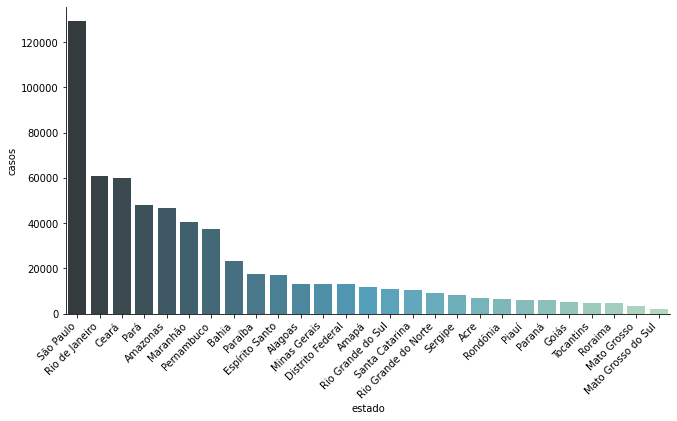

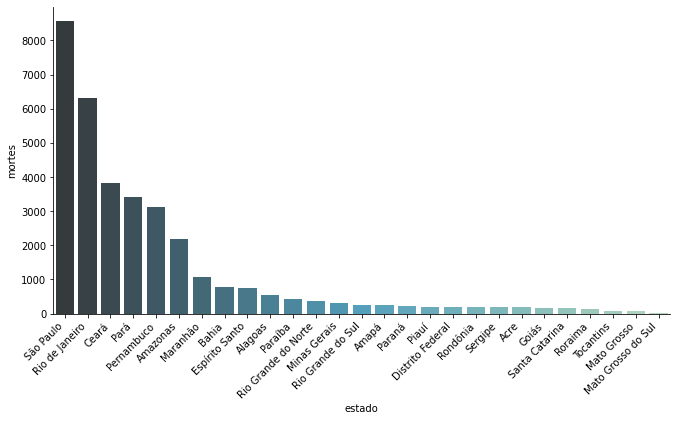

In [8]:
df_estado.sort_values(by=['casos'], inplace= True, ascending= False)
g = sns.catplot(x='estado',y='casos',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(g)
df_estado.sort_values(by=['mortes'], inplace= True, ascending= False)
h = sns.catplot(x='estado',y='mortes',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in h.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(h)
            

## Dados do Brasil

In [9]:
df_Brasil = dados2[['date','state','cases','deaths']]
df_Brasil.head()

,date,state,cases,deaths
0,2020-02-25,Distrito Federal,0,0
1,2020-02-25,Goiás,0,0
2,2020-02-25,Mato Grosso,0,0
3,2020-02-25,Mato Grosso do Sul,0,0
4,2020-02-25,Alagoas,0,0


In [10]:
selecao = (df_Brasil['cases'] == 0) & (df_Brasil['deaths'] == 0)
df_Brasil = df_Brasil[~selecao]
df_Brasil.index= range(df_Brasil.shape[0])
df_Brasil

,date,state,cases,deaths
0,2020-02-26,São Paulo,1,0
1,2020-02-27,São Paulo,1,0
2,2020-02-28,São Paulo,1,0
3,2020-02-29,São Paulo,2,0
4,2020-03-01,São Paulo,2,0
...,...,...,...,...
2242,2020-06-04,Rio de Janeiro,60932,6327
2243,2020-06-04,São Paulo,129200,8560
2244,2020-06-04,Paraná,5820,215
2245,2020-06-04,Rio Grande do Sul,11010,265


In [11]:
data = df_Brasil['date'].unique()
data

array(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-

In [12]:
df_Bdata={}
s=0
for i in range(len(data)):
  s=0
  for j in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][j]:
      s+= df_Brasil['cases'][j]
      df_Bdata.update({data[i]:s})
df_Bdata = pd.DataFrame(df_Bdata,index=['casos'])
df_Bdata = df_Bdata.transpose()
df_Bdata.reset_index(level=0,inplace=True)
df_Bdata.rename(columns={'index':'data'},inplace=True)
df_Bdata.head(10)

,data,casos
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2
5,2020-03-02,2
6,2020-03-03,2
7,2020-03-04,3
8,2020-03-05,7
9,2020-03-06,13


## Quantidade de casos atual no Brasil

data: 2020-06-04, casos: 614941
Diferença do dia anterior 30925


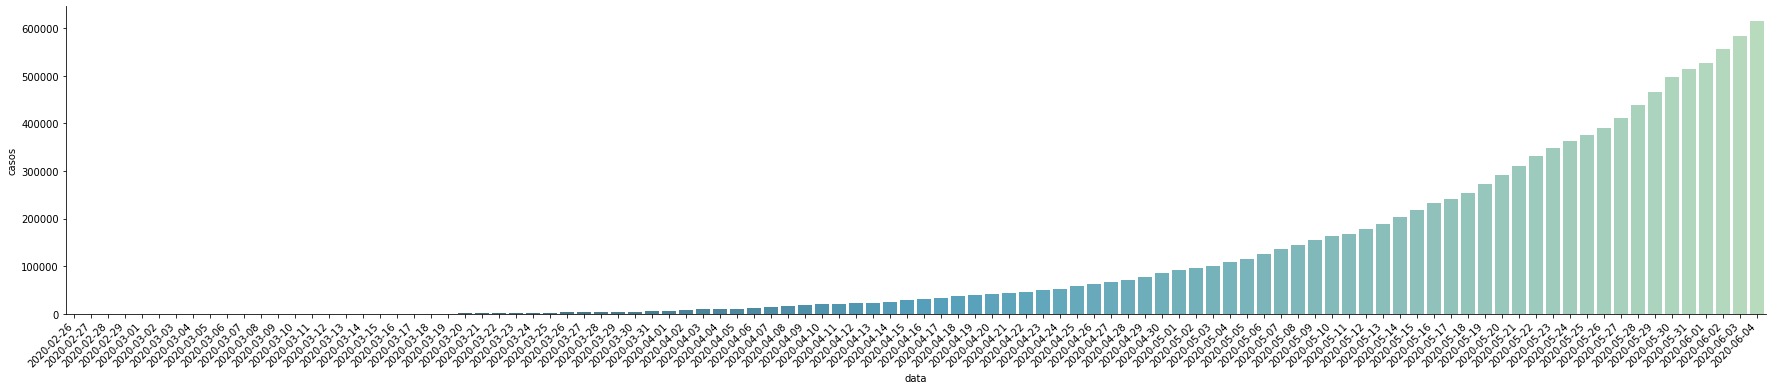

In [37]:
j = sns.catplot(x='data',y='casos',data=df_Bdata, kind="bar",
            palette="GnBu_d", aspect = 5)
for ax in j.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(j)
print('data: {}, casos: {}'.format(df_Bdata['data'][len(data)-1], df_Bdata['casos'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdata['casos'][len(data)-1]-df_Bdata['casos'][len(data)-2]))

#Computando os dados de mortes confirmadas

In [25]:
df_Bdatad={}
s=0
for i in range(len(data)):
  s=0
  for t in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][t]:
      s+= df_Brasil['deaths'][t]
      df_Bdatad.update({data[i]:s})
df_Bdatad = pd.DataFrame(df_Bdatad,index=['deaths'])
df_Bdatad = df_Bdatad.transpose()
df_Bdatad.reset_index(level=0,inplace=True)
df_Bdatad.rename(columns={'index':'data'},inplace=True)
df_Bdatad.head(10)

,data,deaths
0,2020-02-26,0
1,2020-02-27,0
2,2020-02-28,0
3,2020-02-29,0
4,2020-03-01,0
5,2020-03-02,0
6,2020-03-03,0
7,2020-03-04,0
8,2020-03-05,0
9,2020-03-06,0


##Quantidade de mortes atual

data: 2020-06-04, mortes: 34021
Diferença do dia anterior 1473


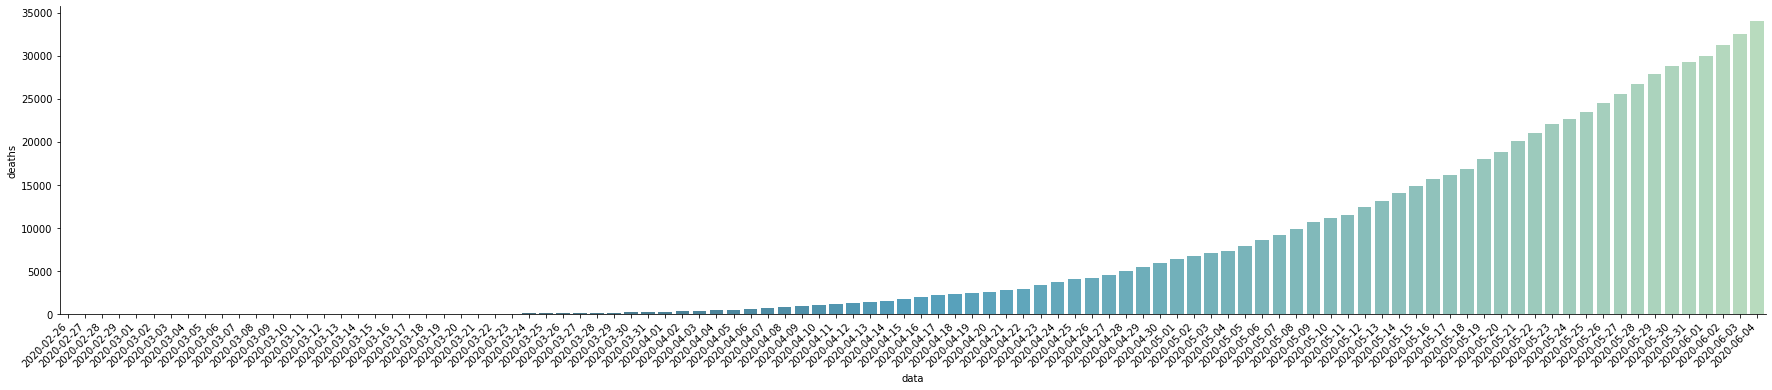

In [36]:
k = sns.catplot(x='data',y='deaths',data=df_Bdatad, kind="bar",
            palette="GnBu_d", aspect = 5)
for ax in k.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

print(k)
print('data: {}, mortes: {}'.format(df_Bdatad['data'][len(data)-1],df_Bdatad['deaths'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdatad['deaths'][len(data)-1]-df_Bdatad['deaths'][len(data)-2]))

#Crescimento em cada estado

In [27]:
dadosPorEstado = {}
for i in range(len(d)):
  dadosPorEstado.update({d[i]:{}})
d[0]

'São Paulo'

In [28]:
for i in range(len(d)):
  dadosPorEstado[d[i]] = dadosLimpo[dadosLimpo['state'] == d[i]]
ddframe = dadosPorEstado
dadosPorEstado
frame = pd.DataFrame()
for i in range(len(d)):
  dd = pd.DataFrame(ddframe[d[i]])
  dd.index= range(dd.shape[0])
  frame = pd.concat([frame,dd])
frame.to_csv("/content/drive/My Drive/Meus testes de dados/dadosestado.csv")
frame

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,São Paulo,1,0
1,2020-02-27,Sudeste,São Paulo,1,0
2,2020-02-28,Sudeste,São Paulo,1,0
3,2020-02-29,Sudeste,São Paulo,2,0
4,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
70,2020-05-31,Norte,Roraima,3474,116
71,2020-06-01,Norte,Roraima,3692,116
72,2020-06-02,Norte,Roraima,3850,120
73,2020-06-03,Norte,Roraima,4143,124


## Numero Casos


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


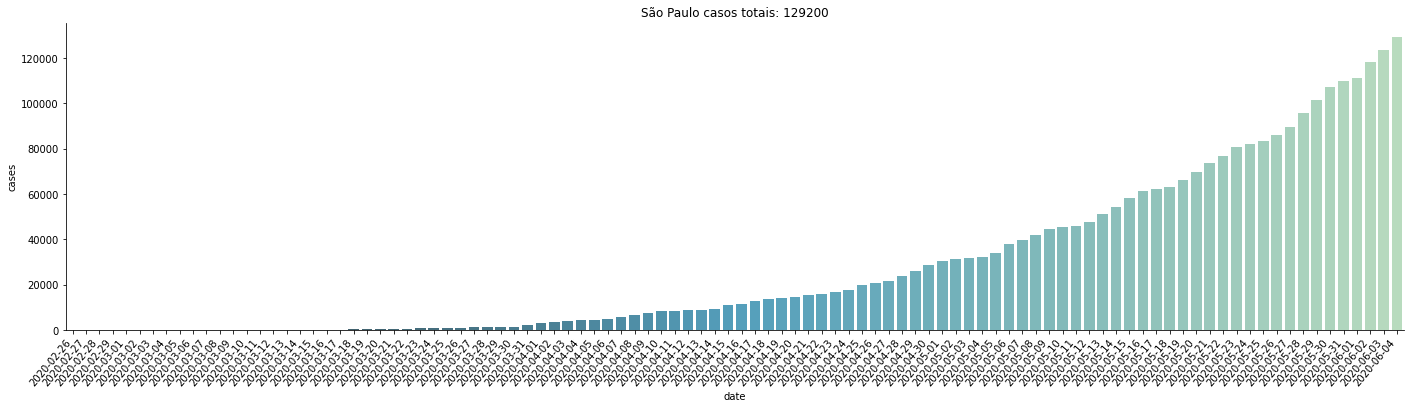

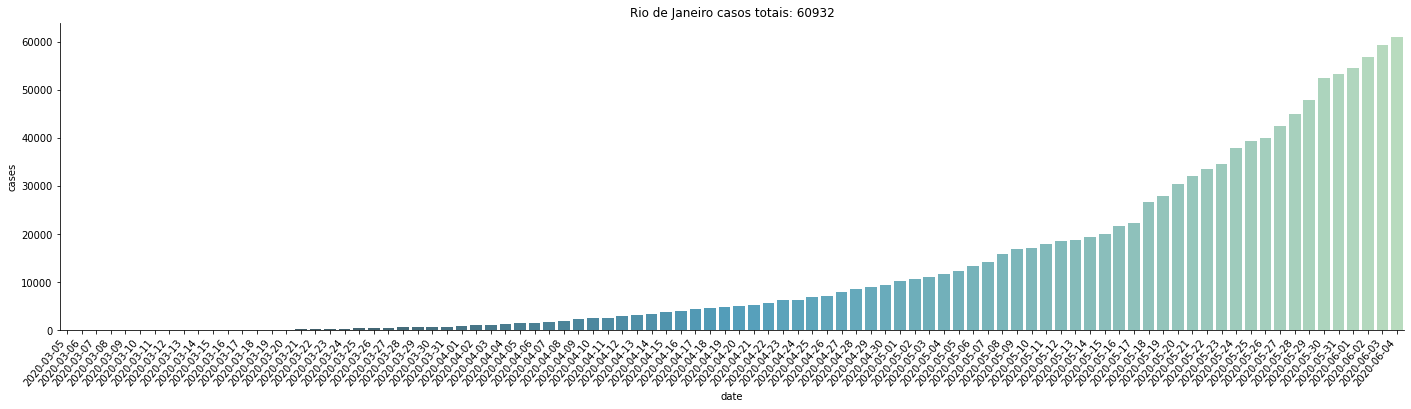

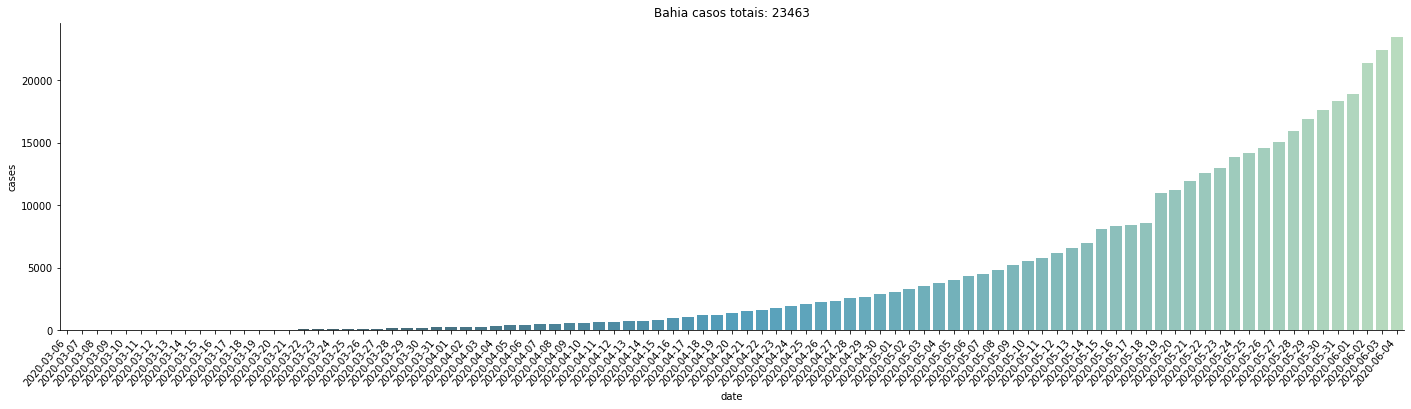

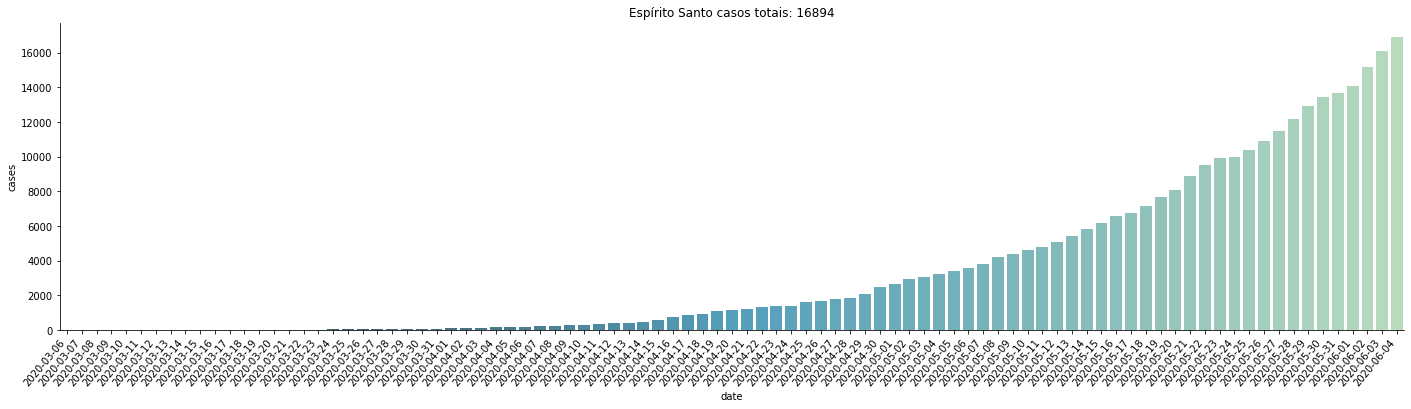

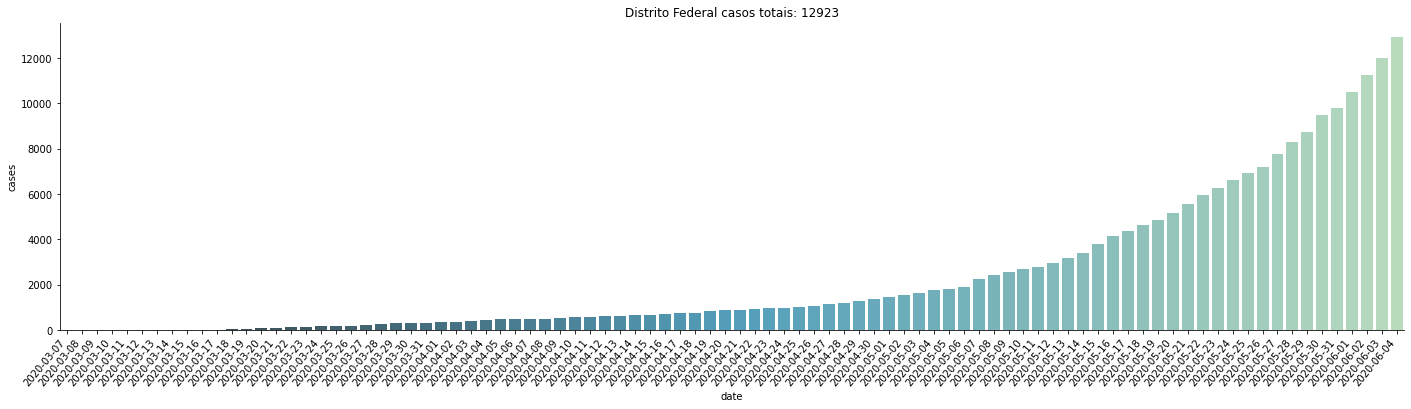

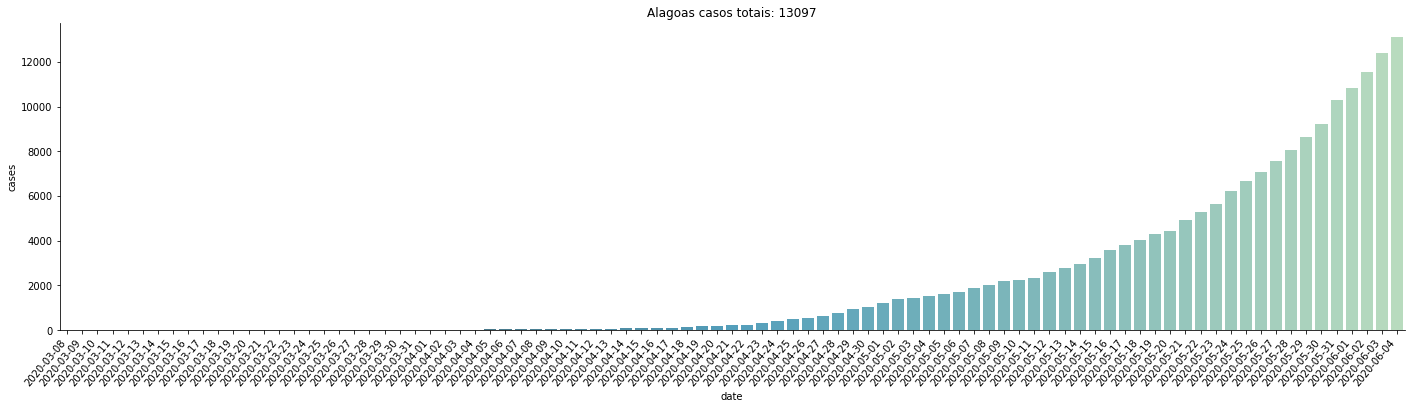

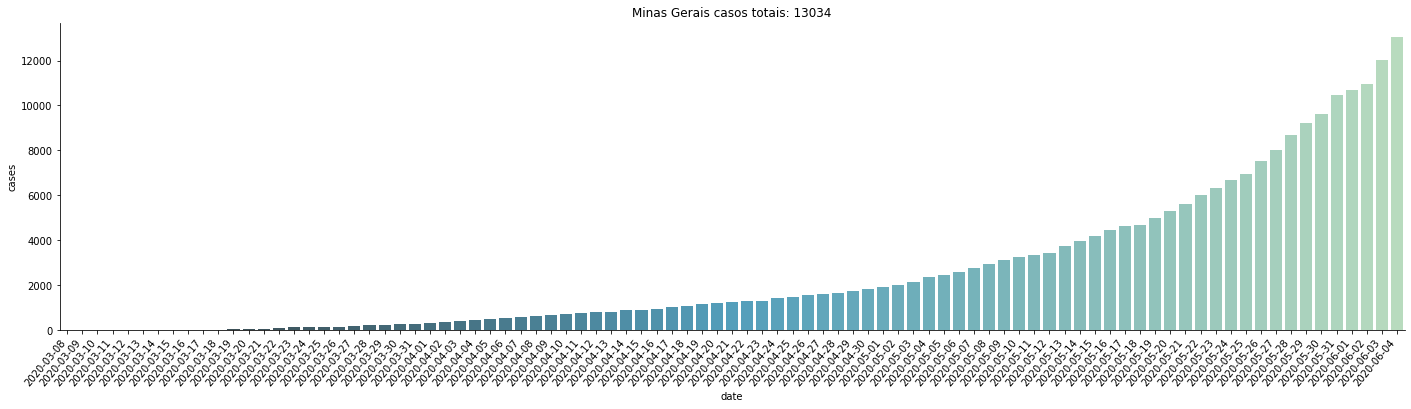

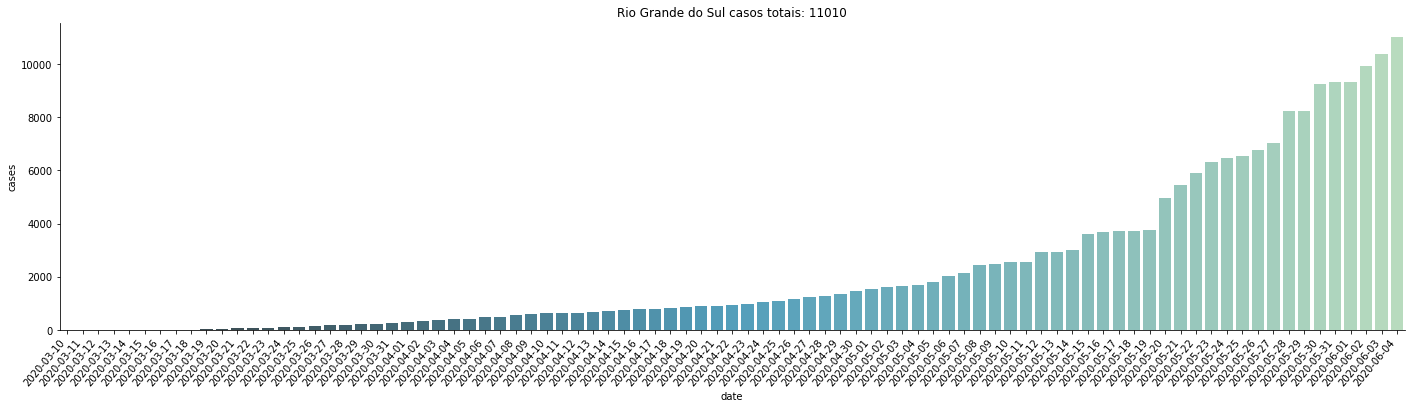

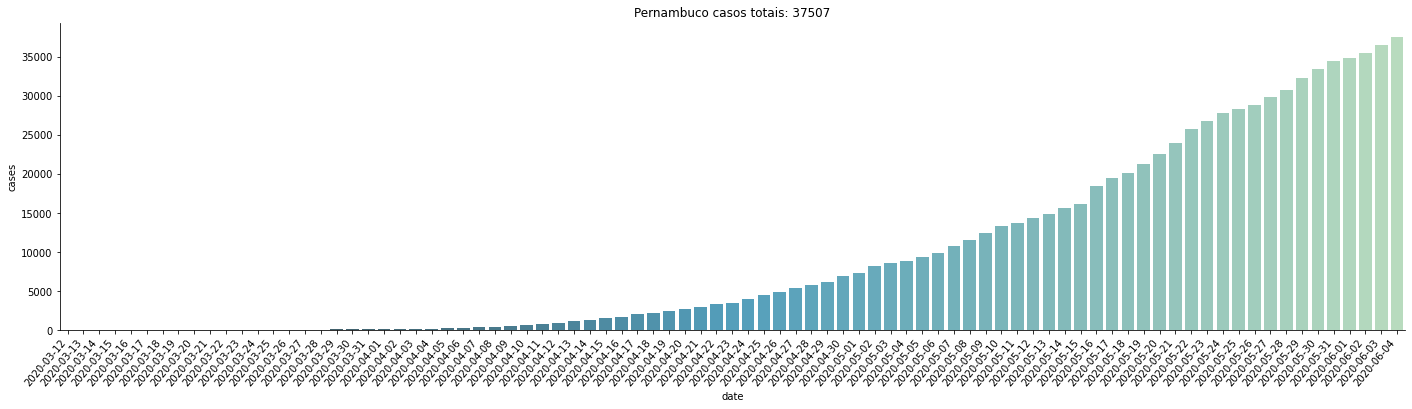

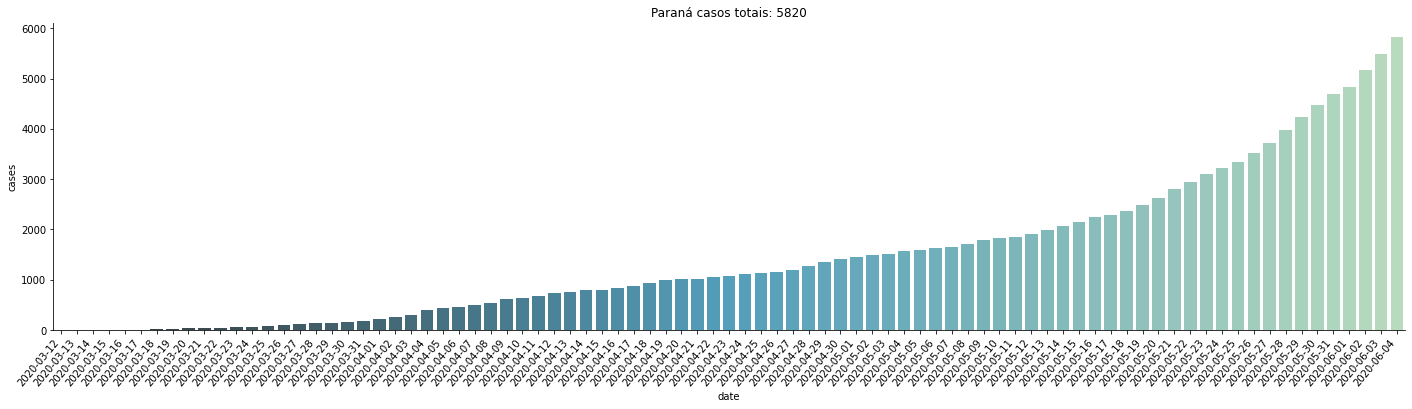

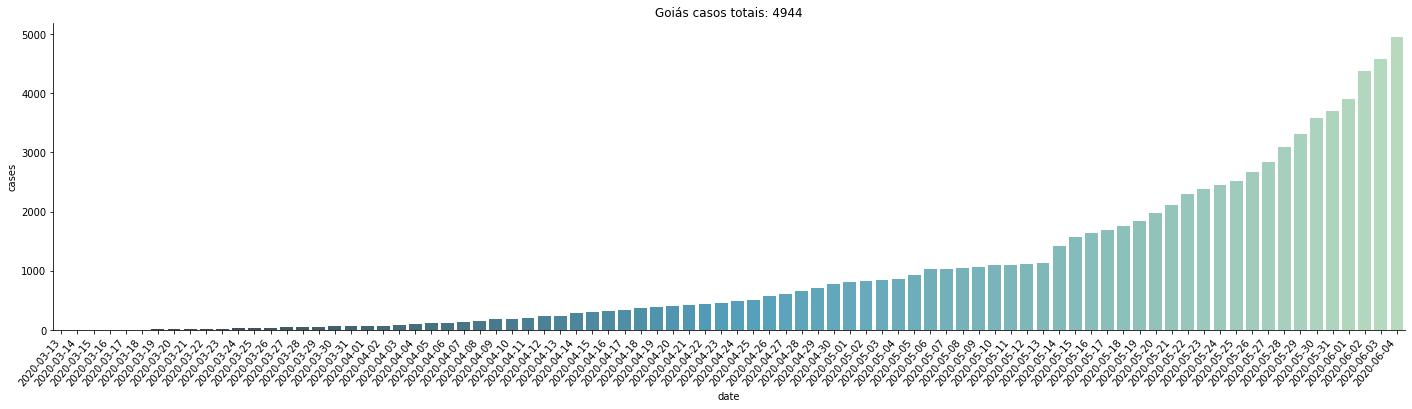

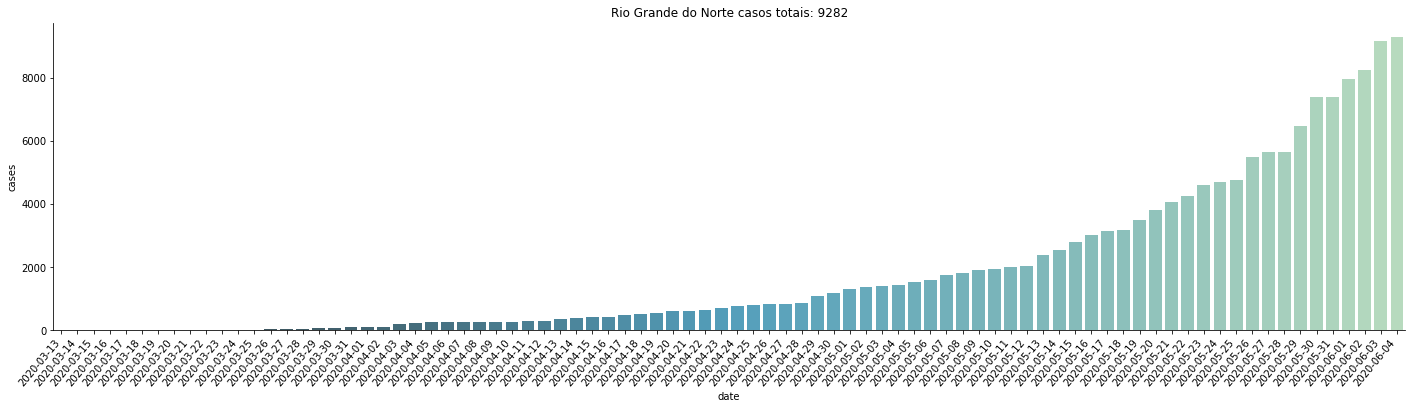

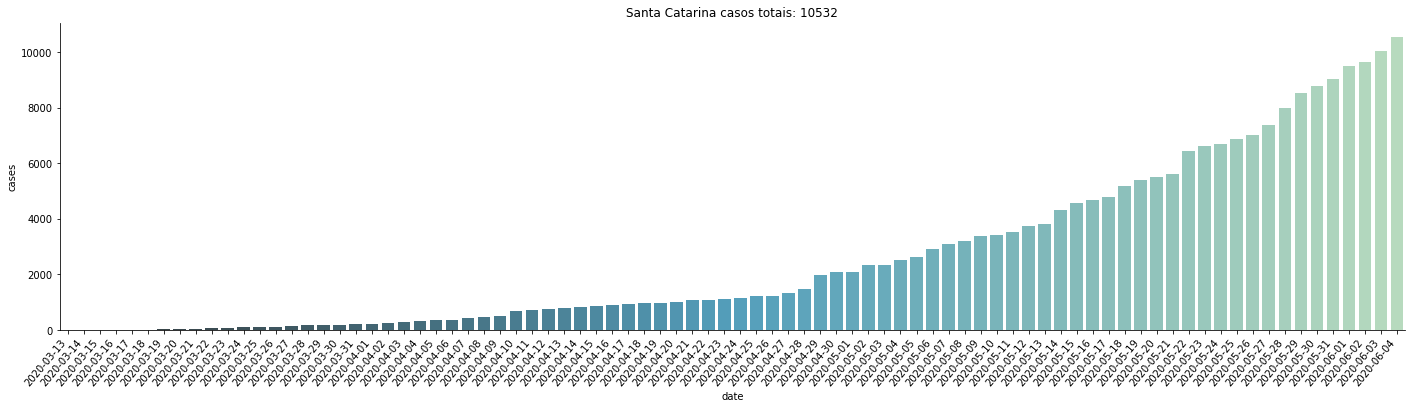

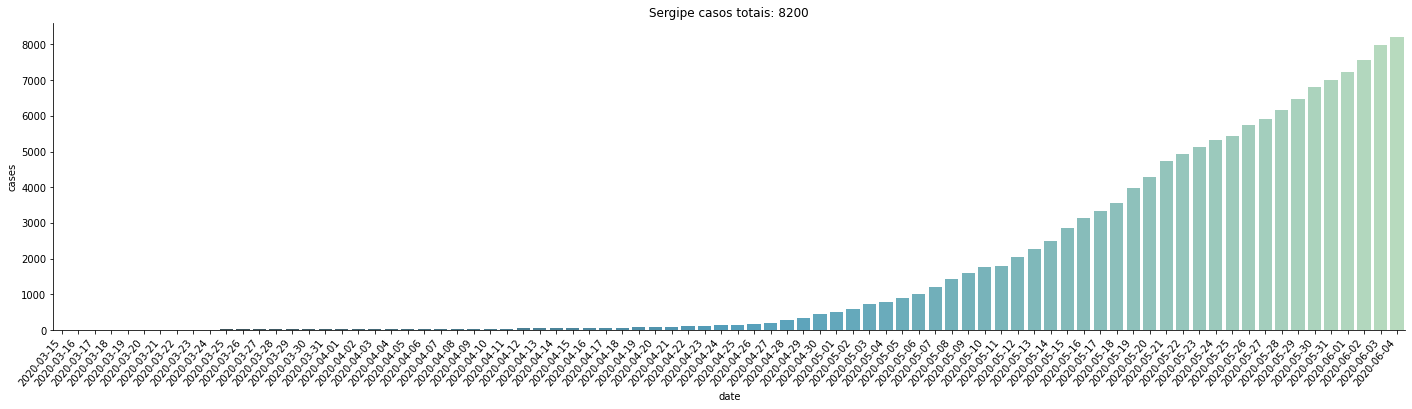

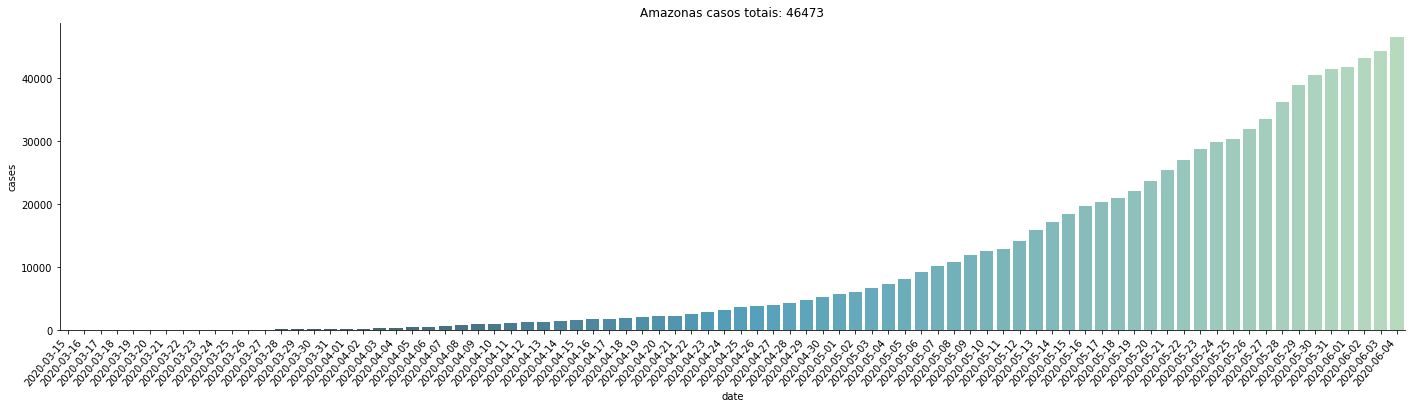

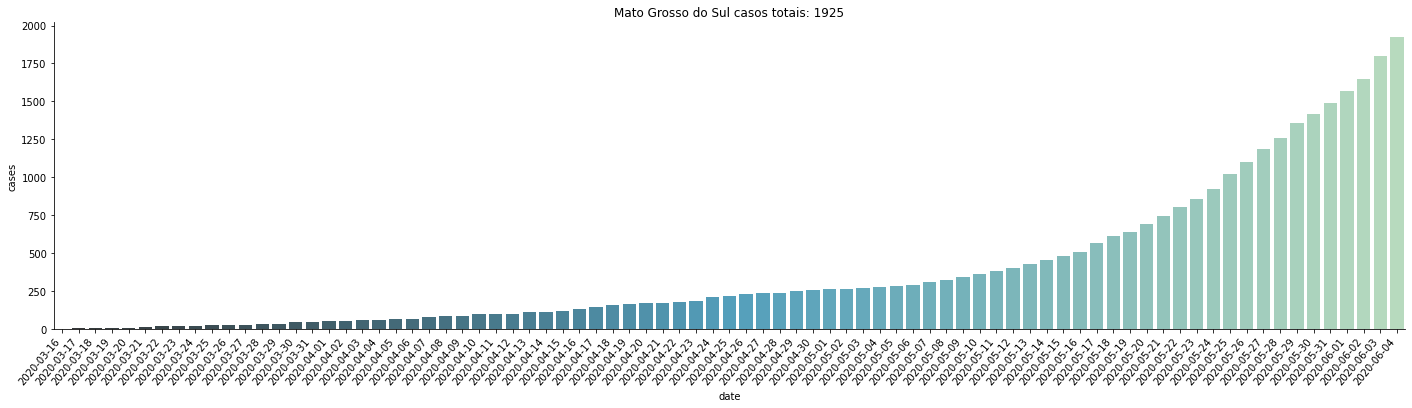

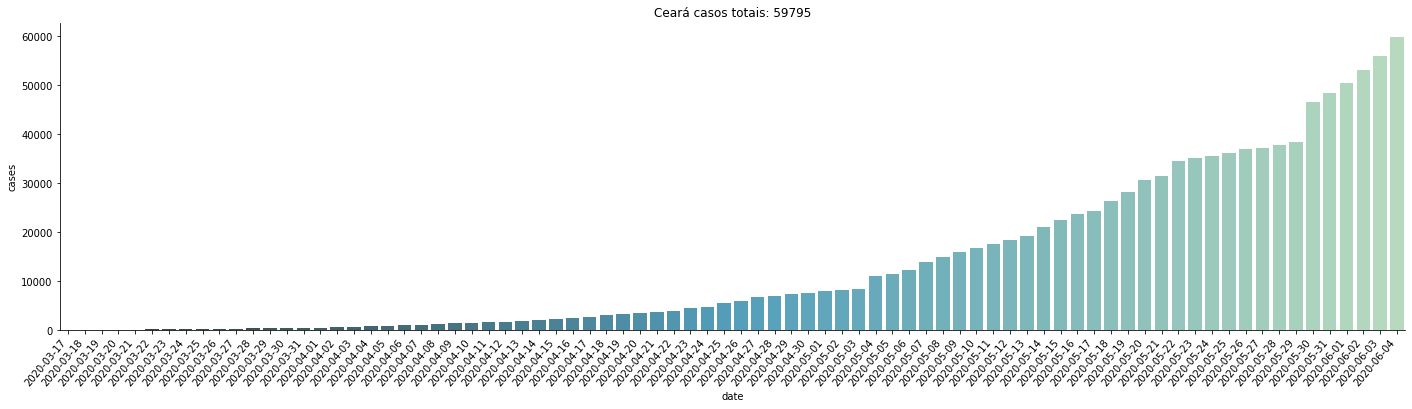

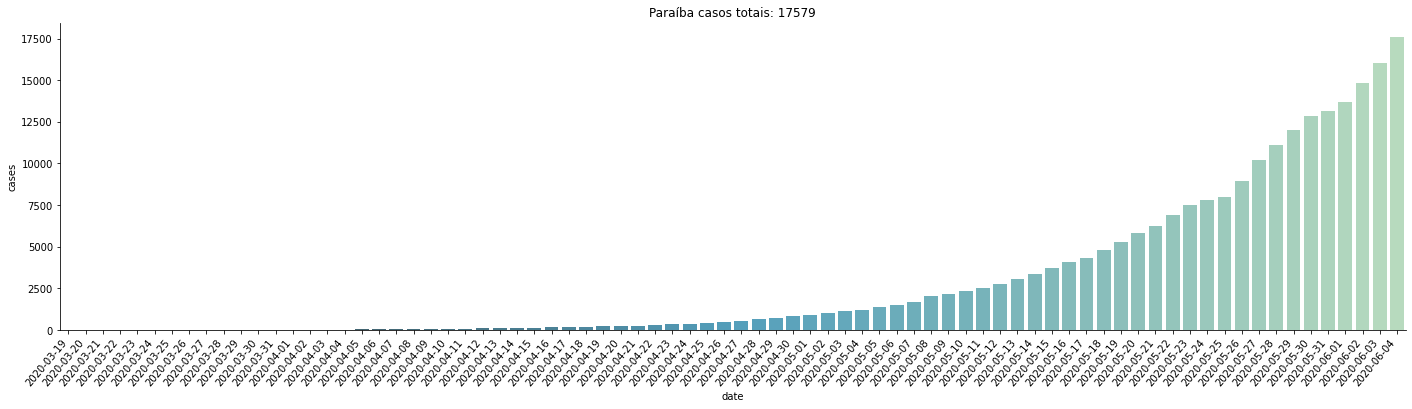

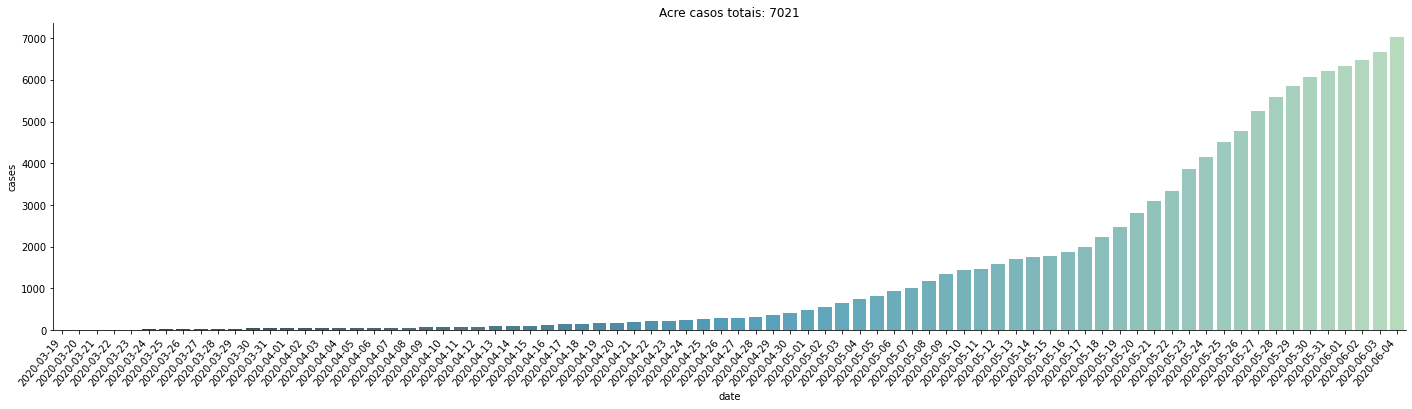

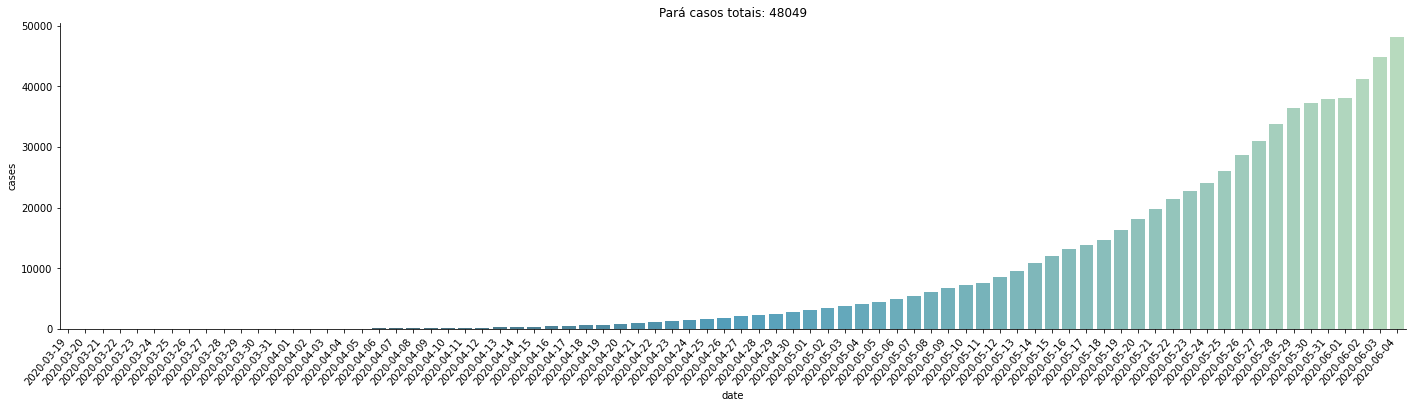

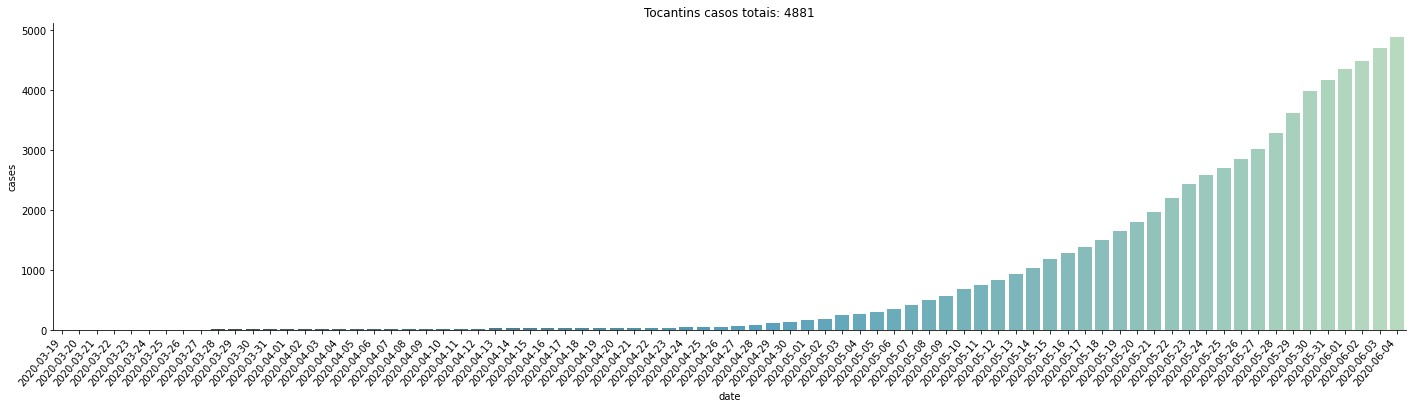

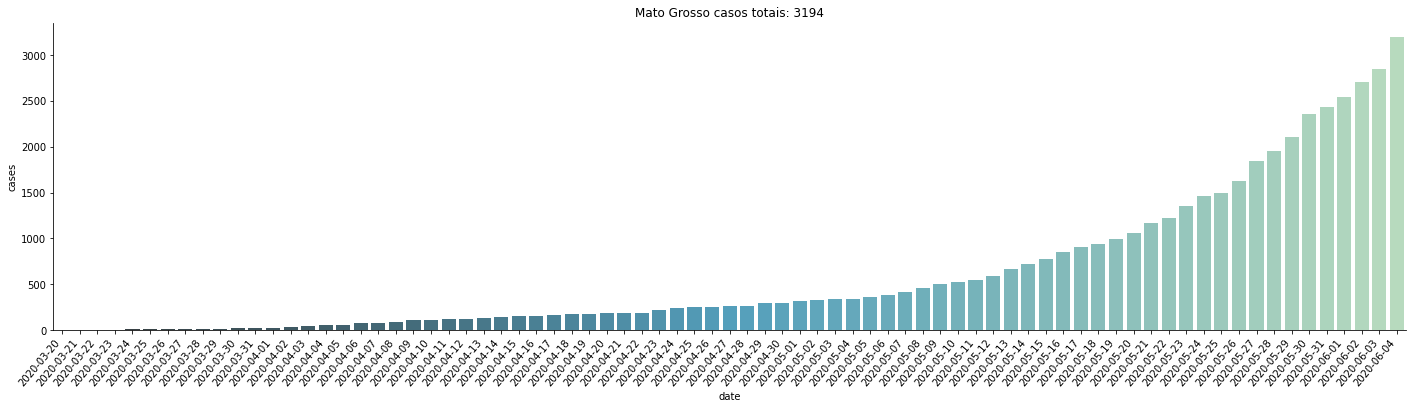

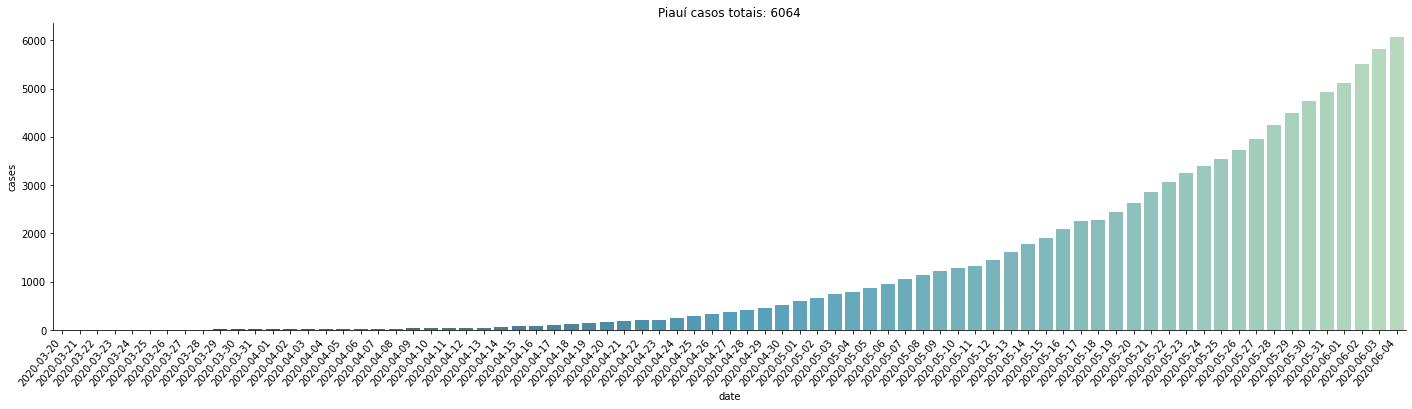

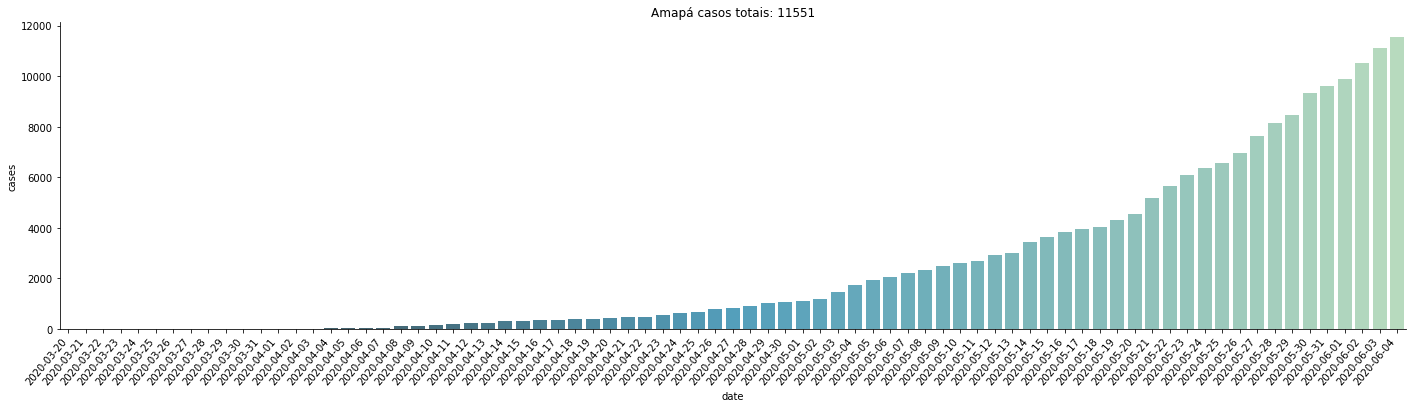

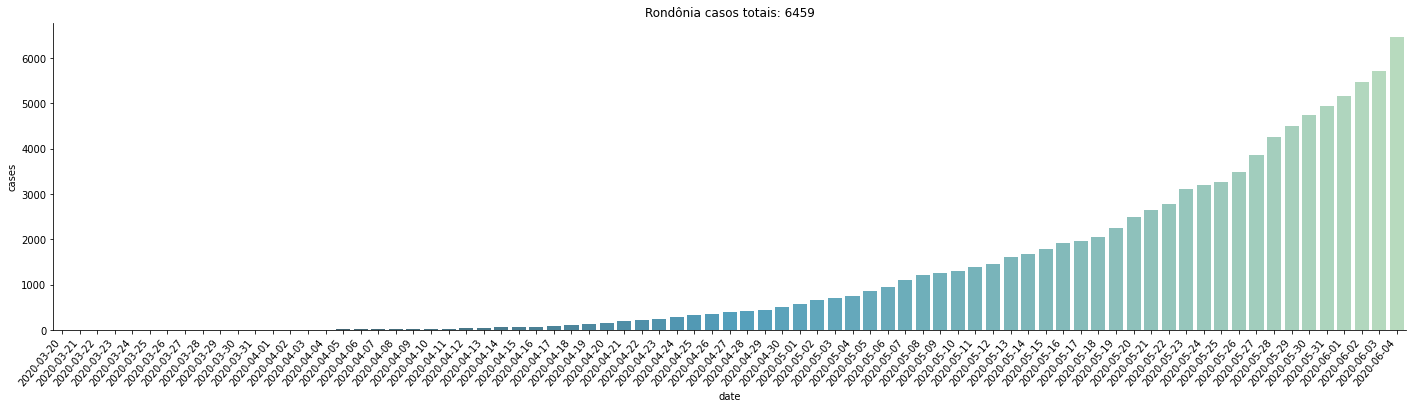

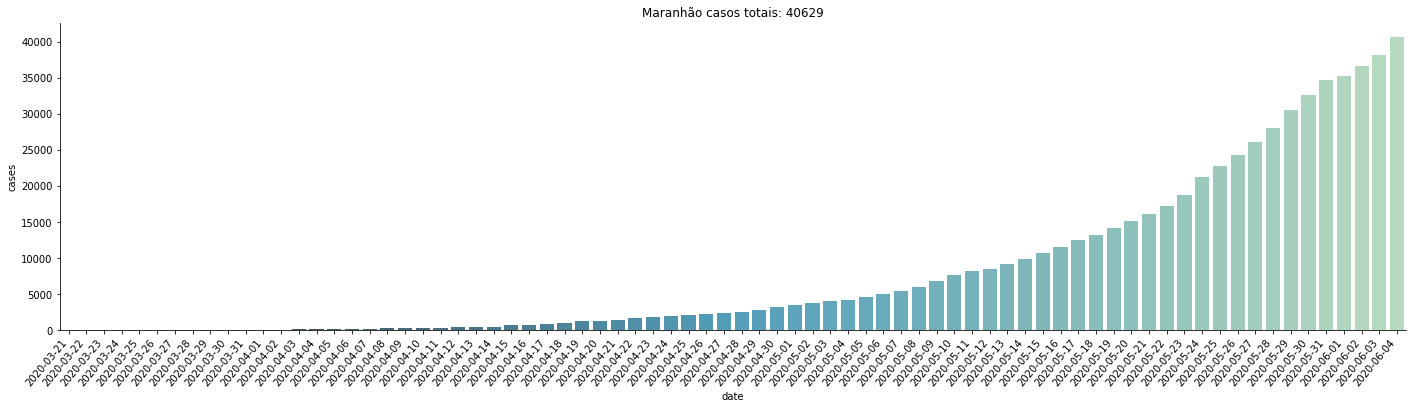

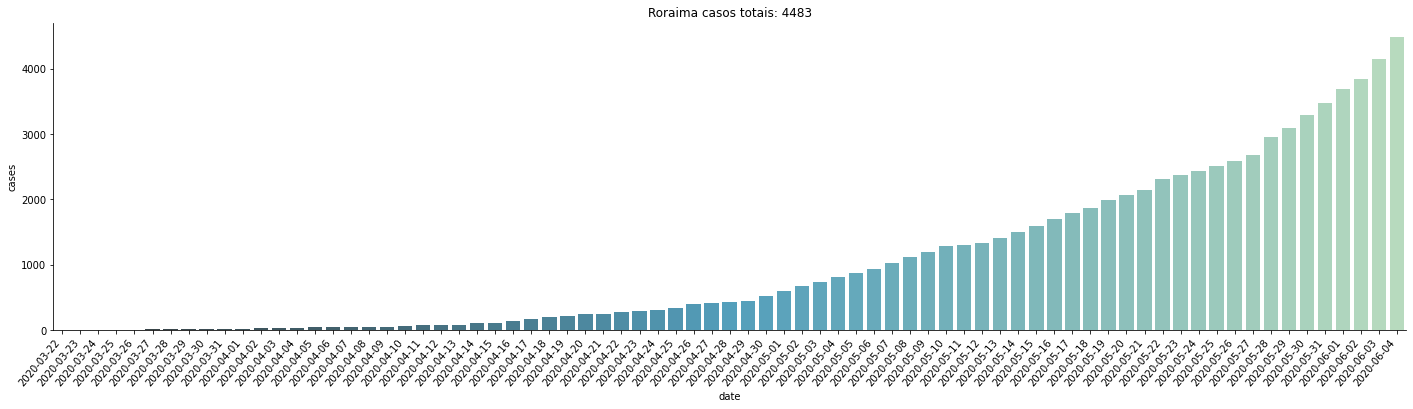

In [33]:
import matplotlib.pyplot as plt
for i in range(len(d)):
  p = sns.catplot(x='date',y='cases', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=4)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(50)
        label.set_horizontalalignment('right')
  Casos_confimados = dadosPorEstado[d[i]]['cases']
  Casos_confimados.index = range(Casos_confimados.shape[0])
  plt.title(d[i]+' casos totais: '+str(Casos_confimados[Casos_confimados.shape[0]-1]))
  print(p)

## Numero de mortes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


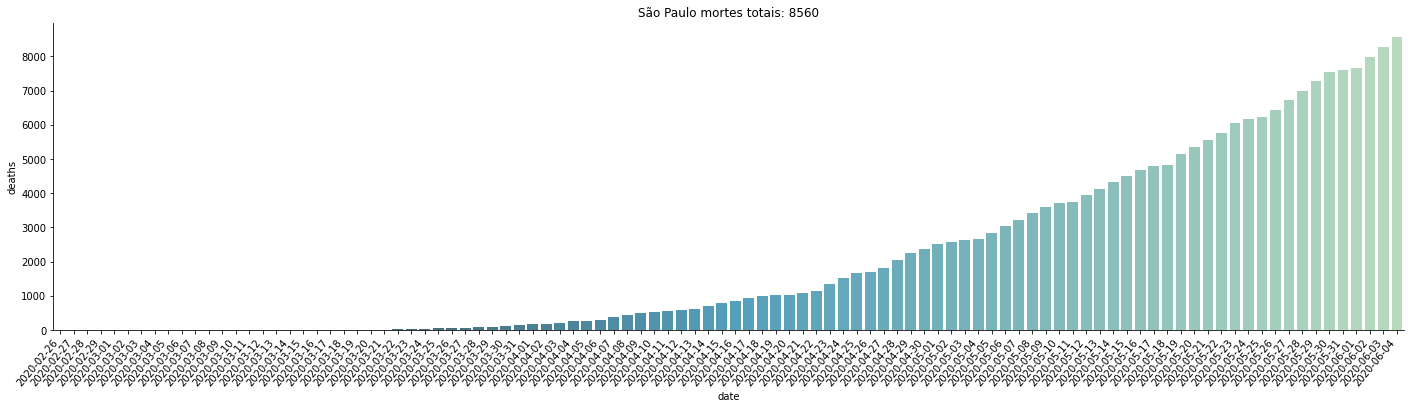

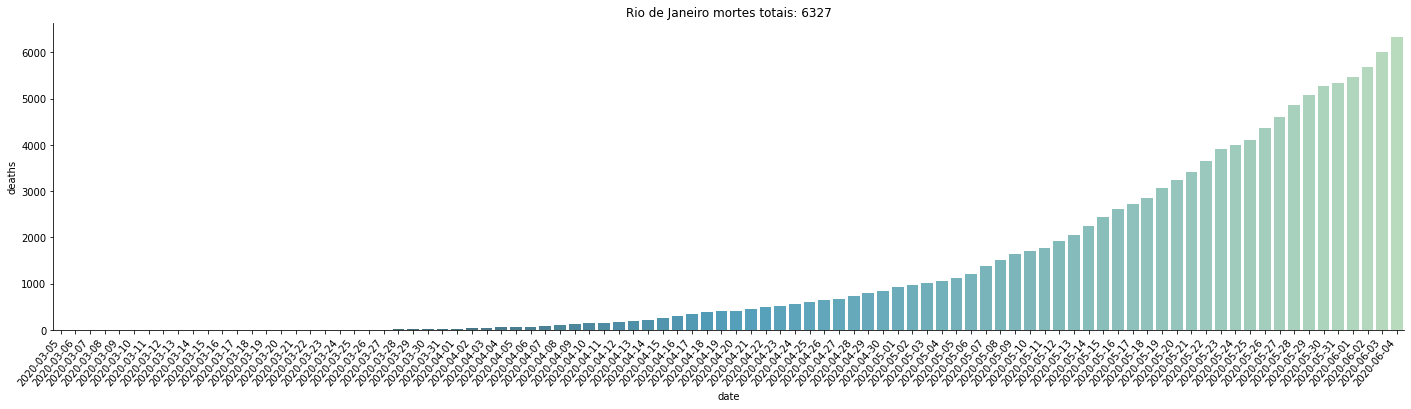

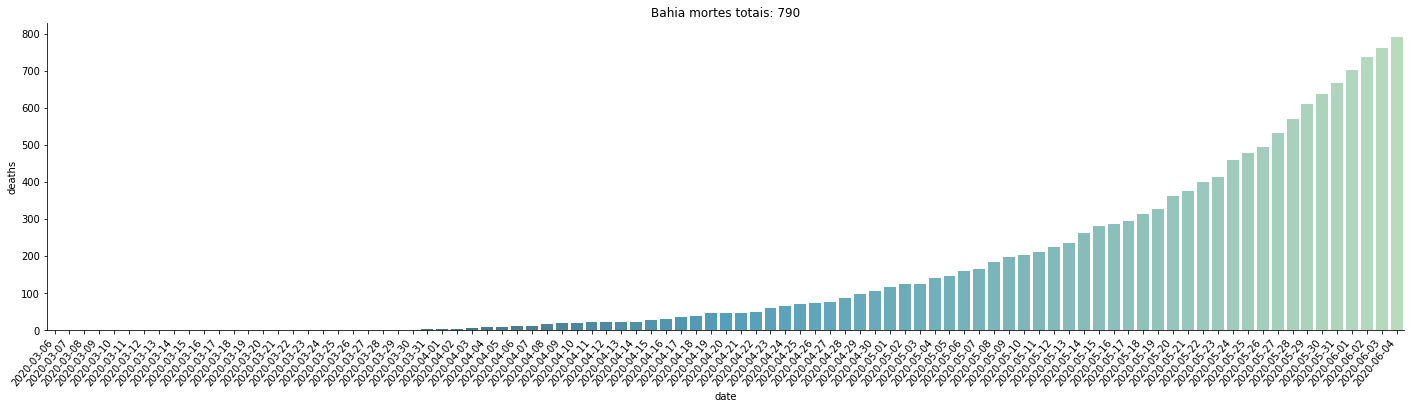

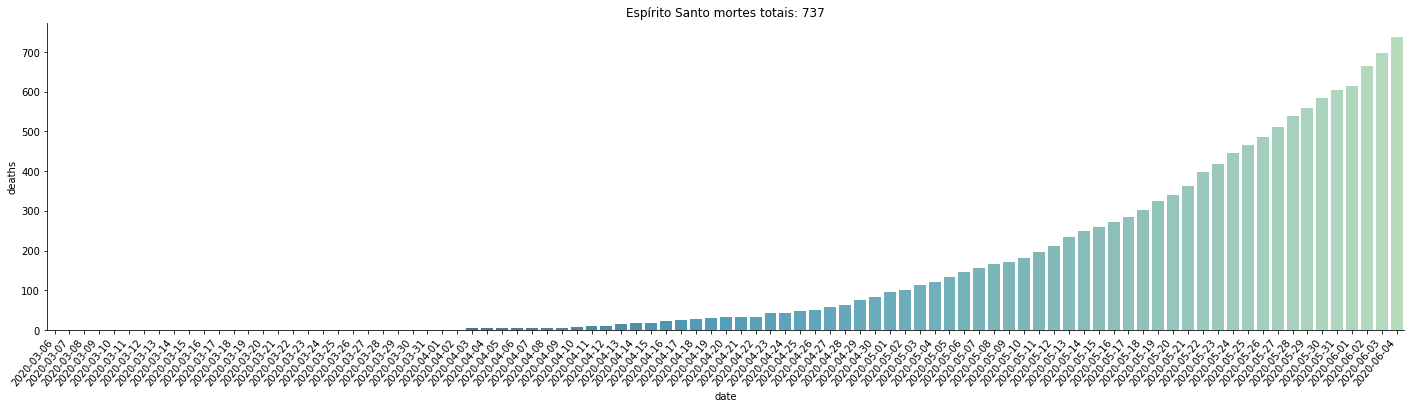

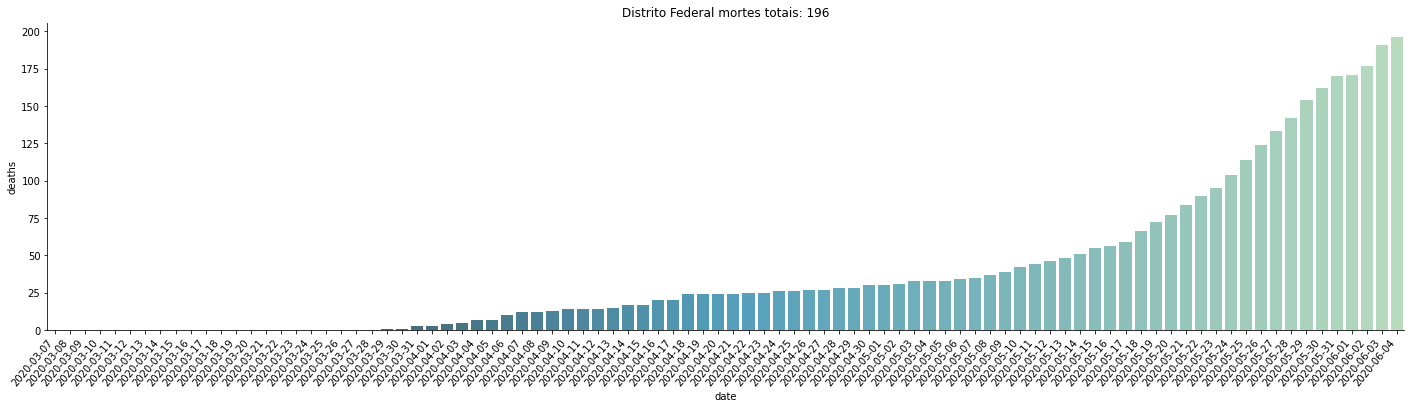

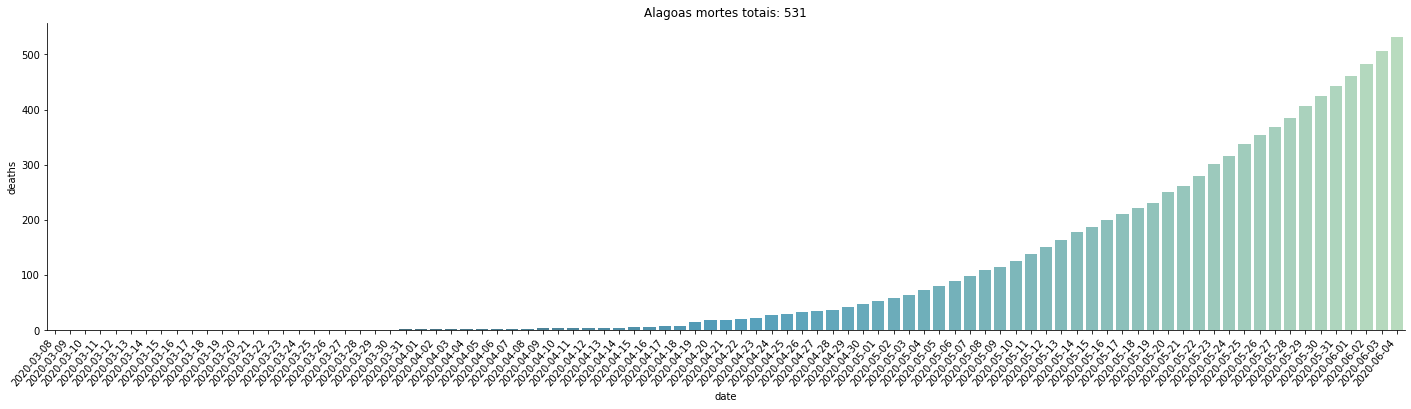

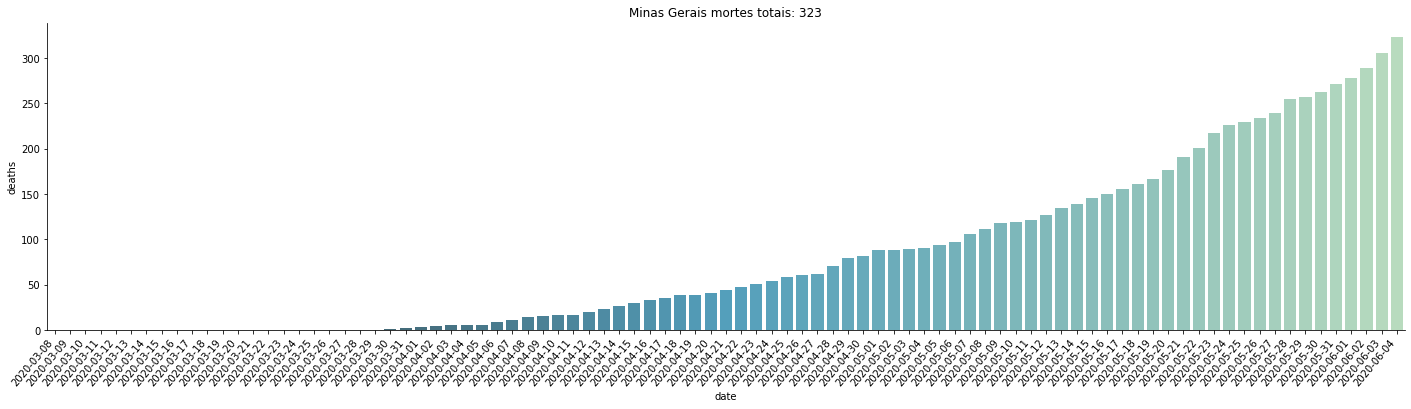

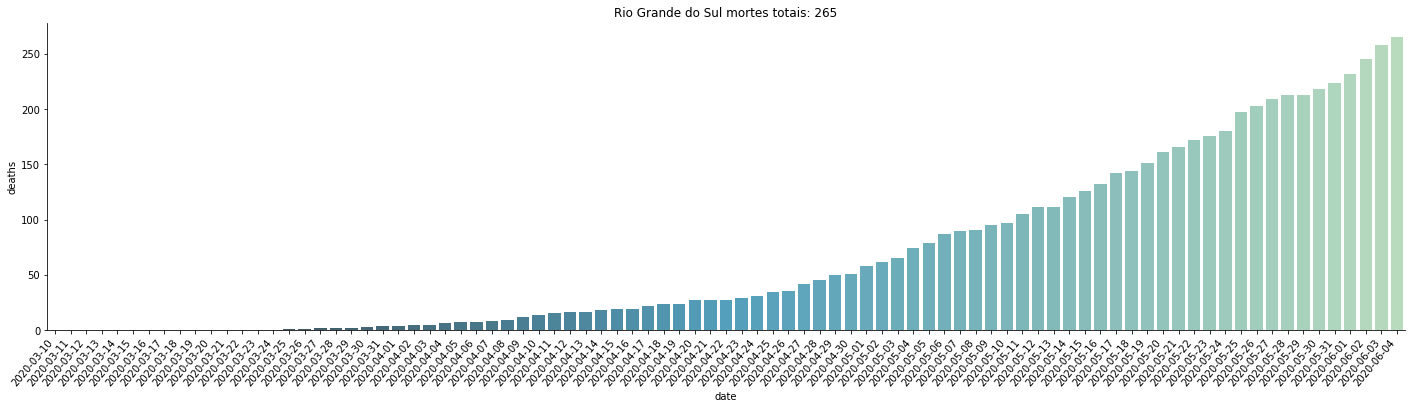

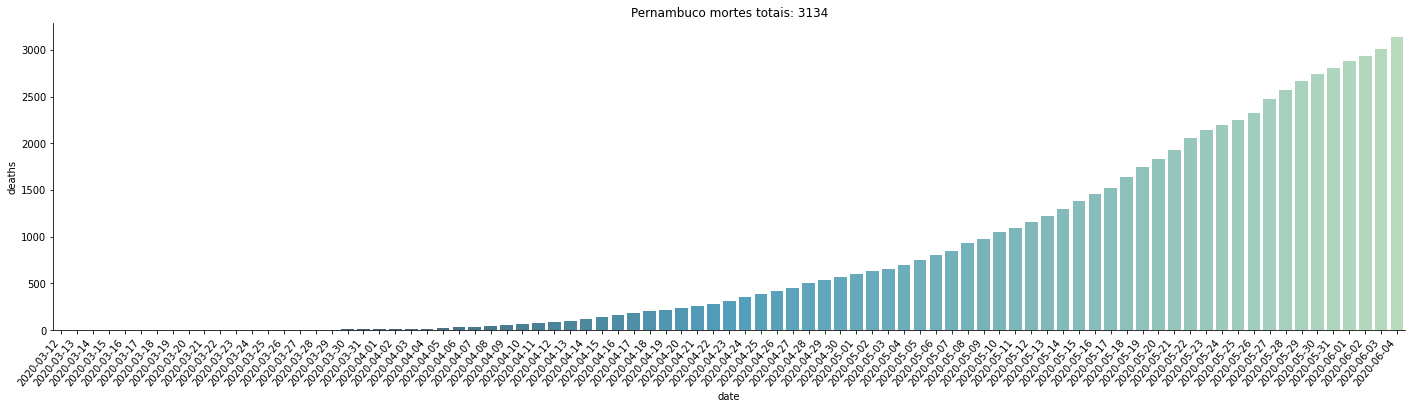

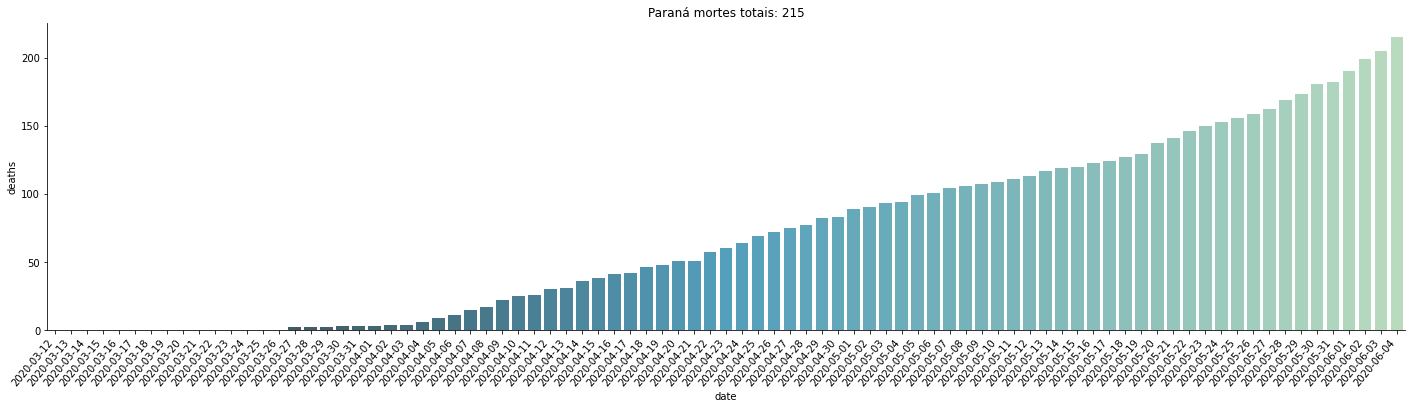

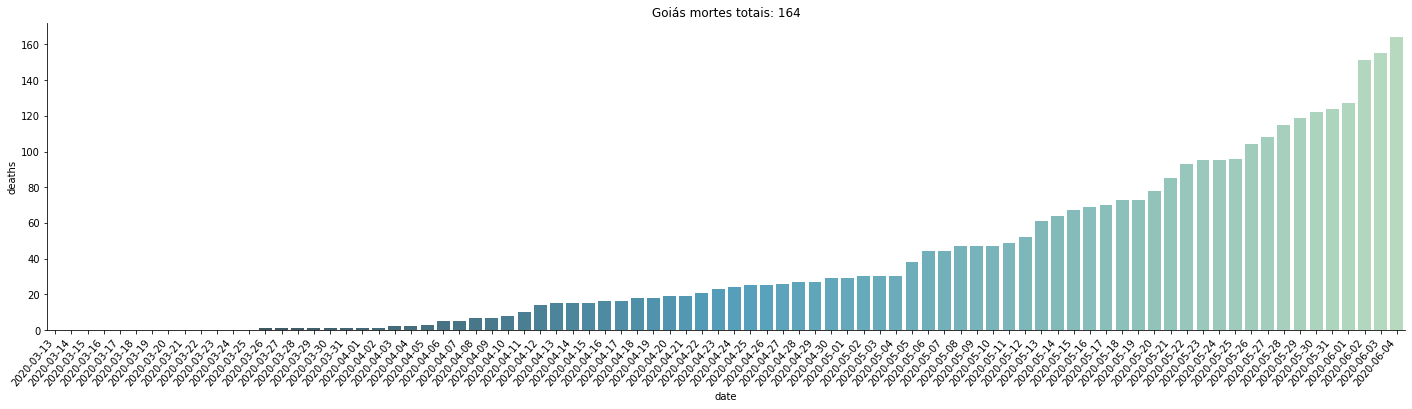

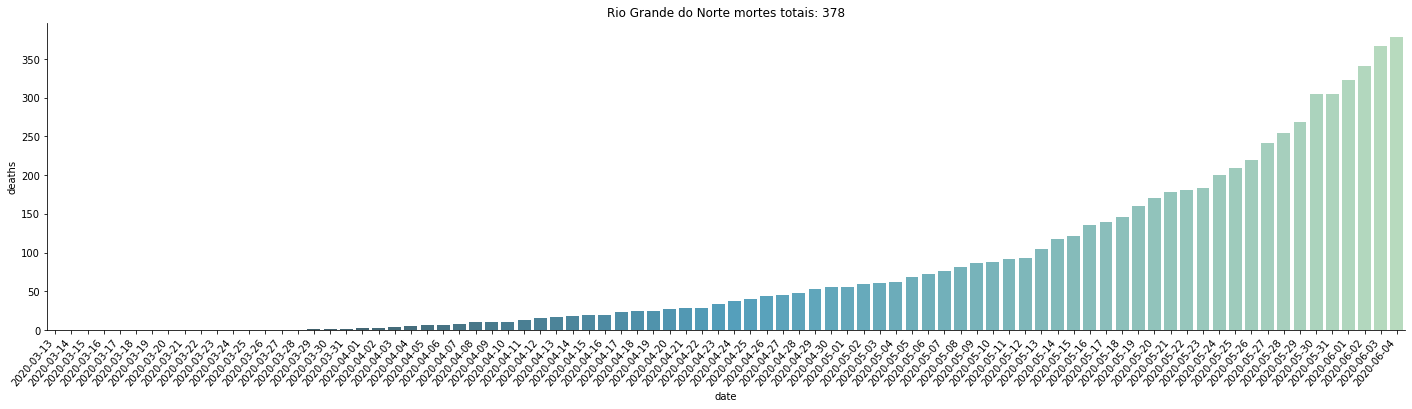

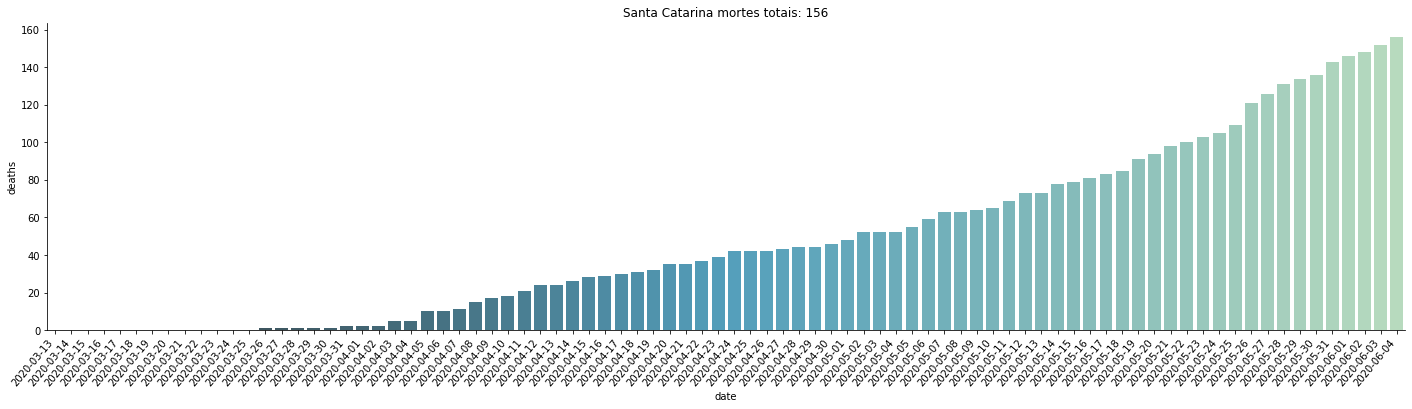

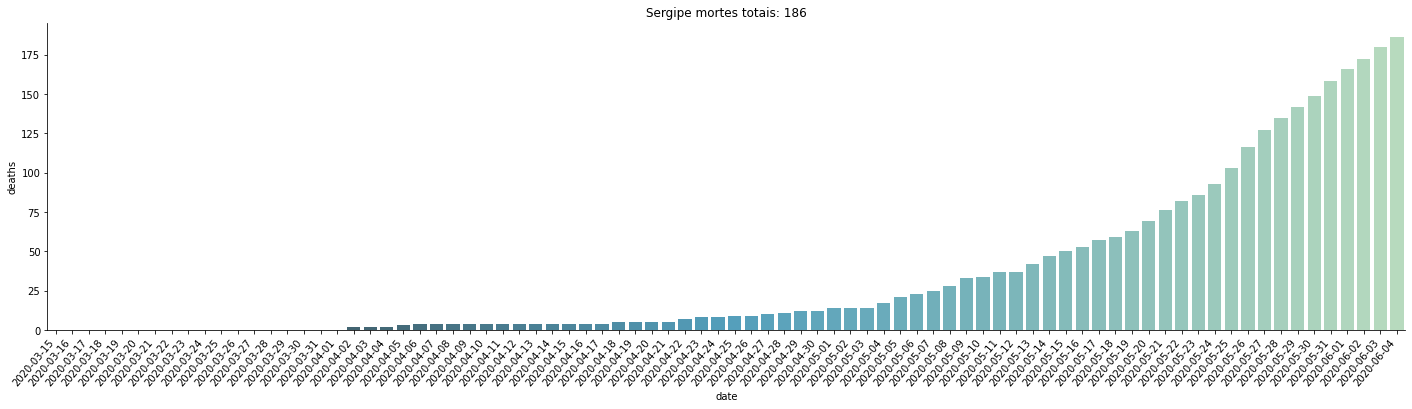

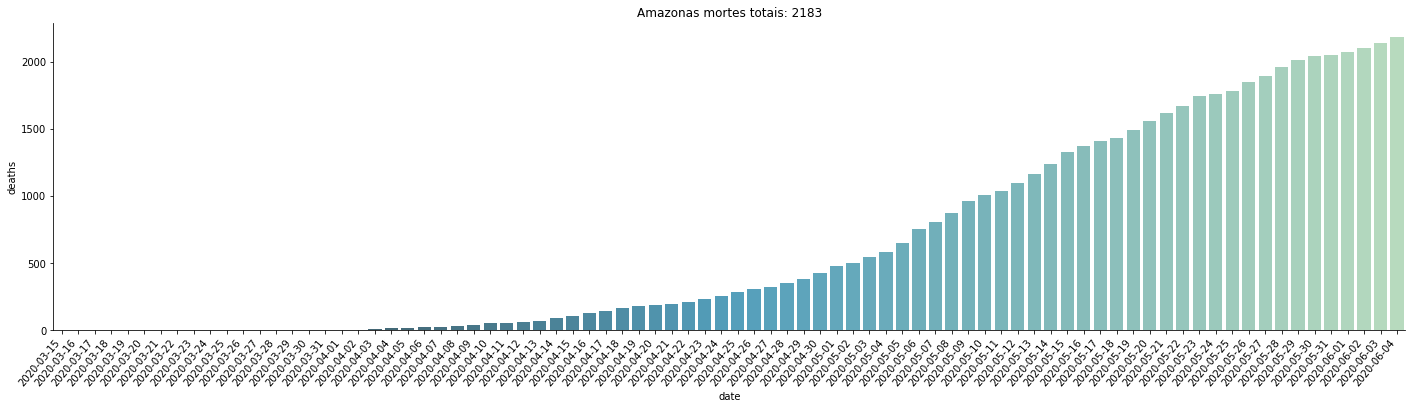

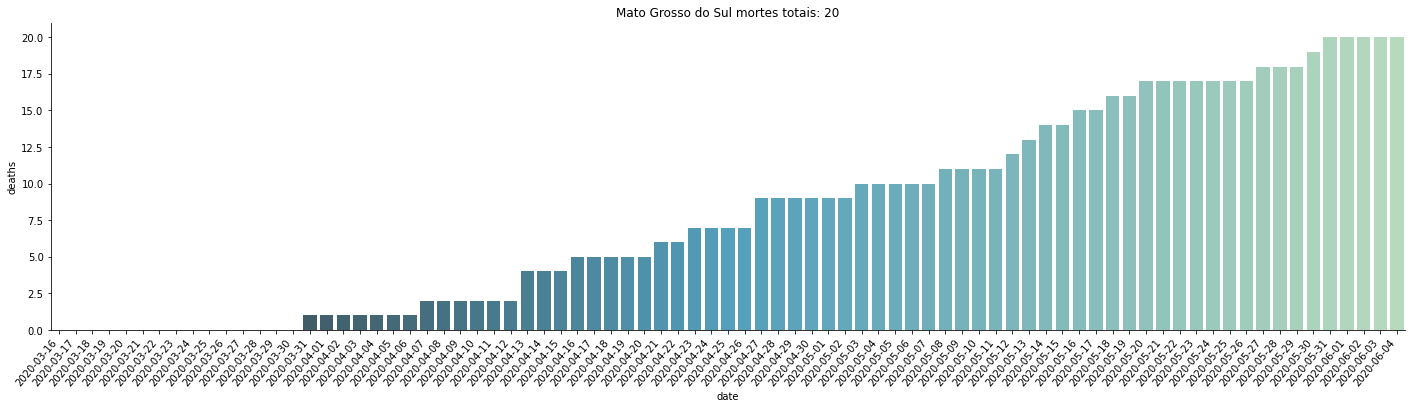

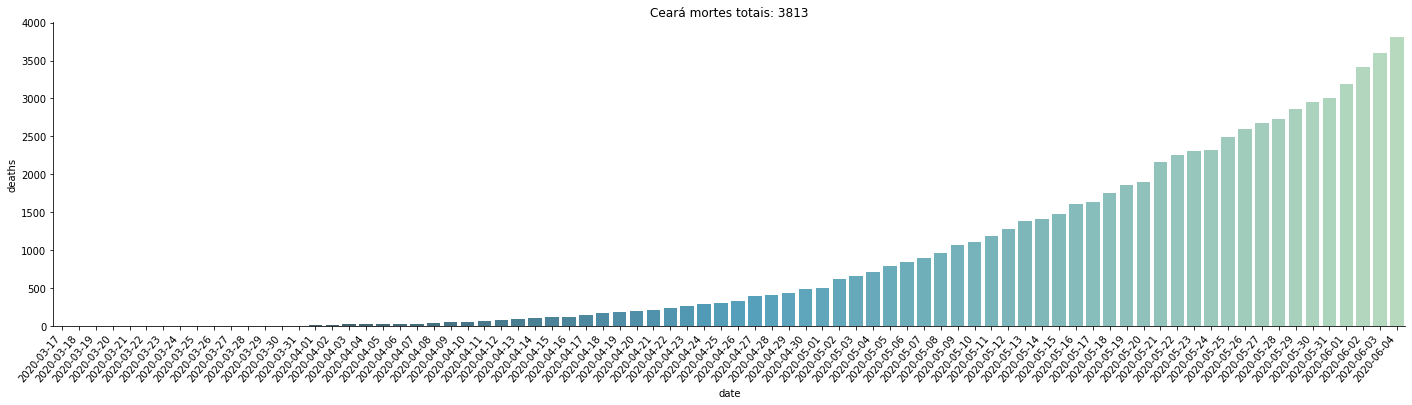

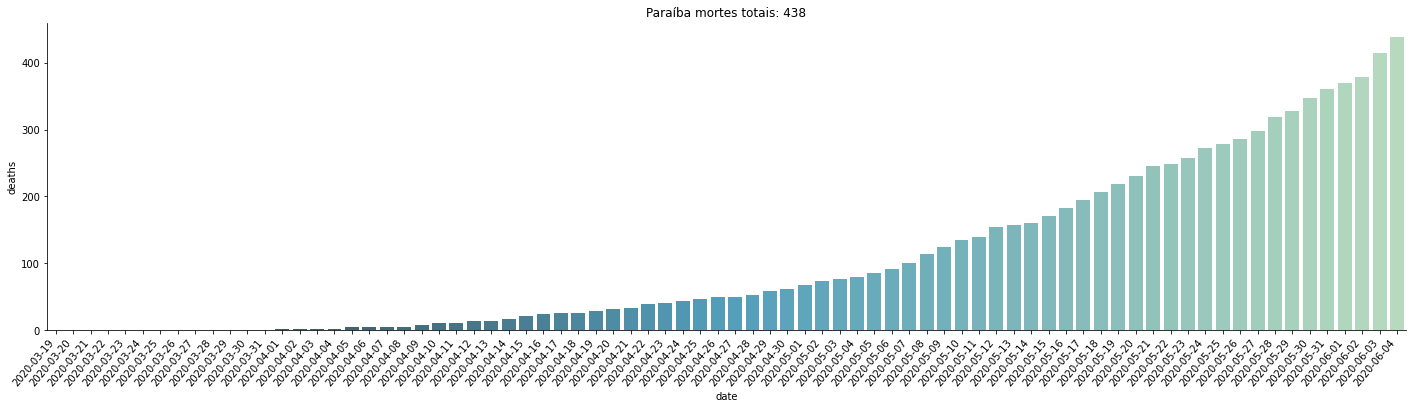

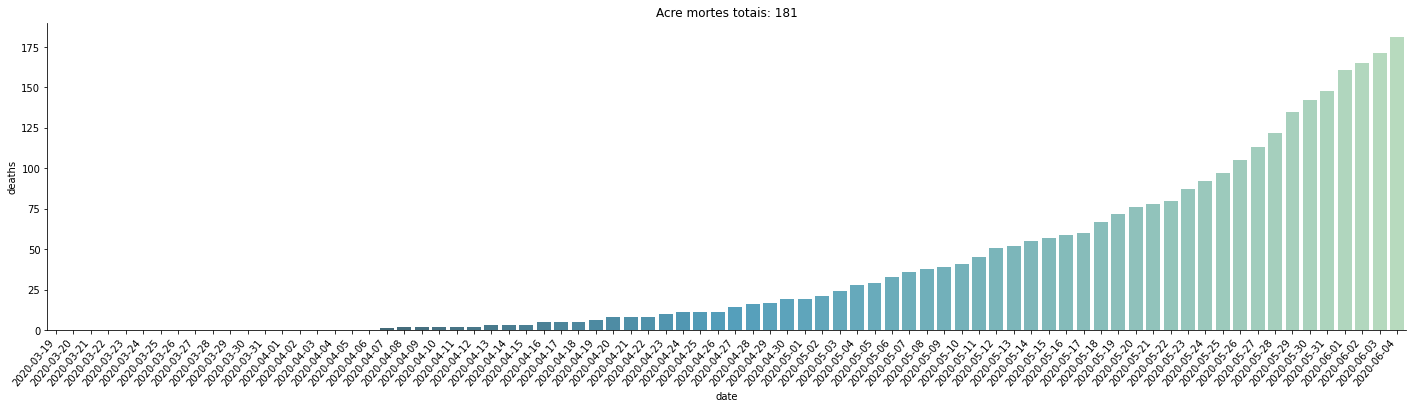

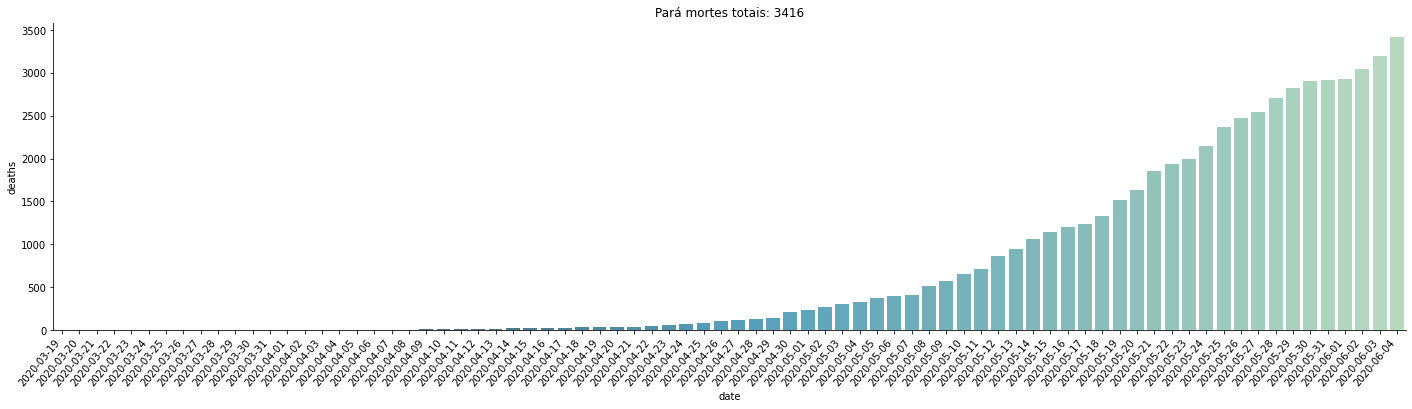

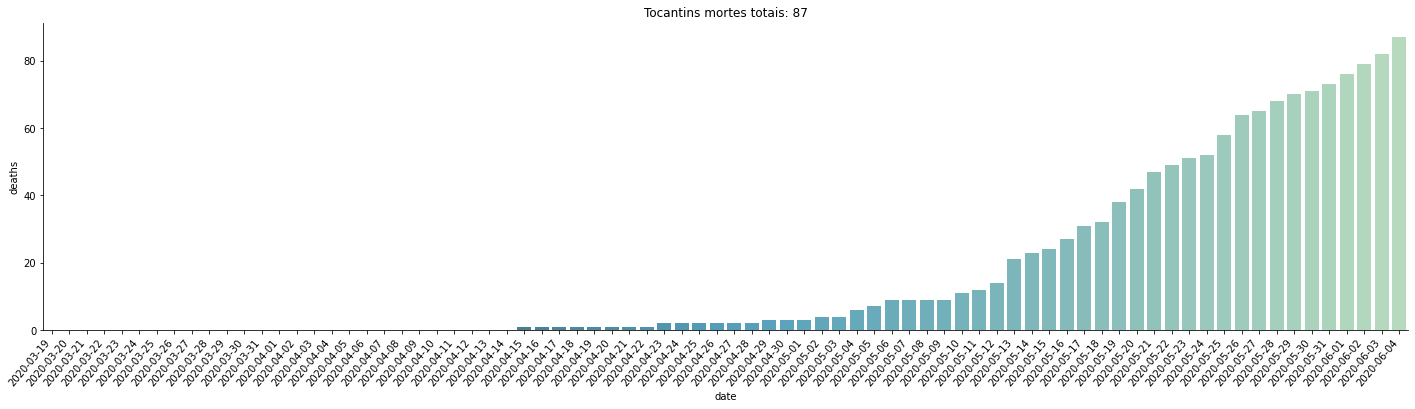

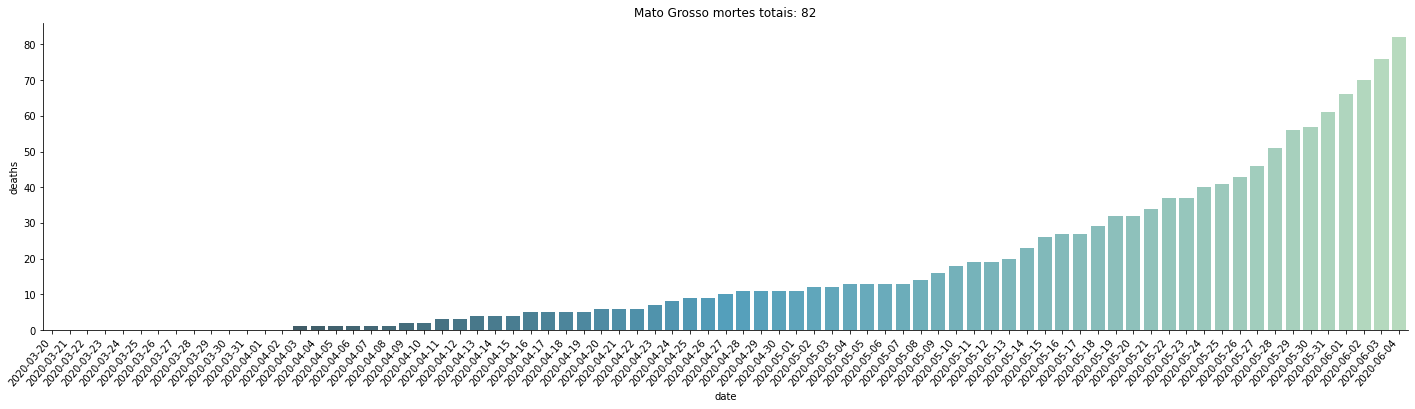

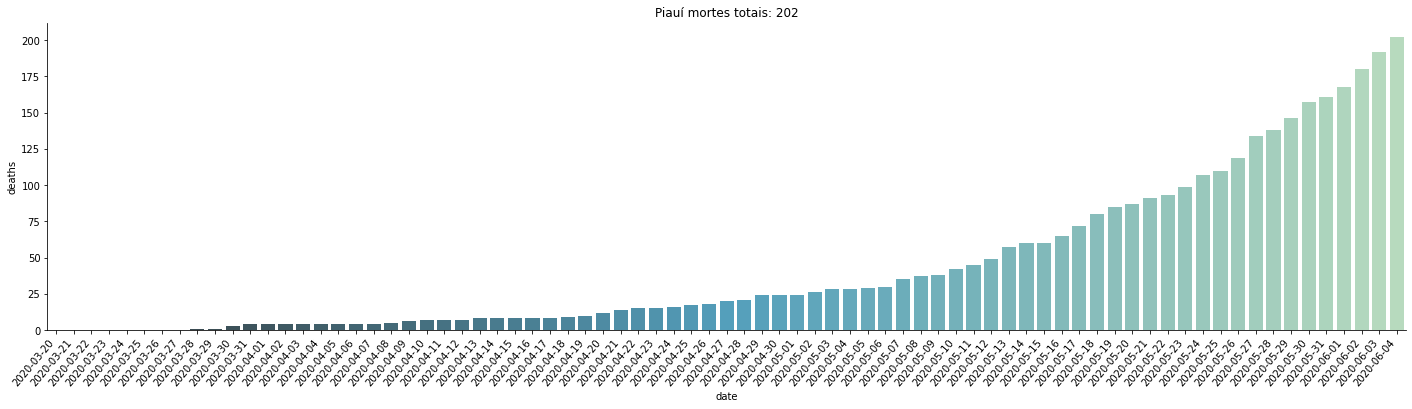

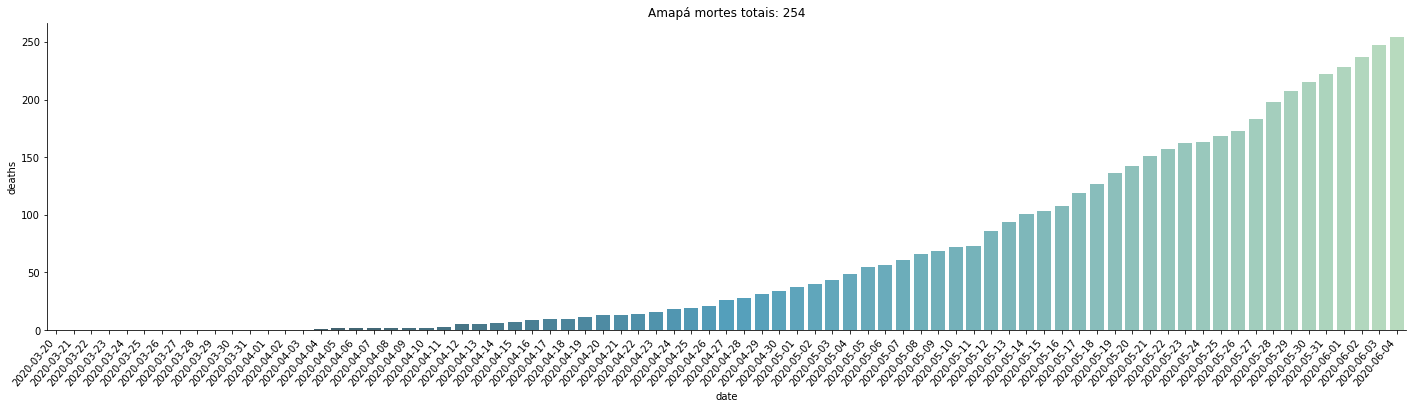

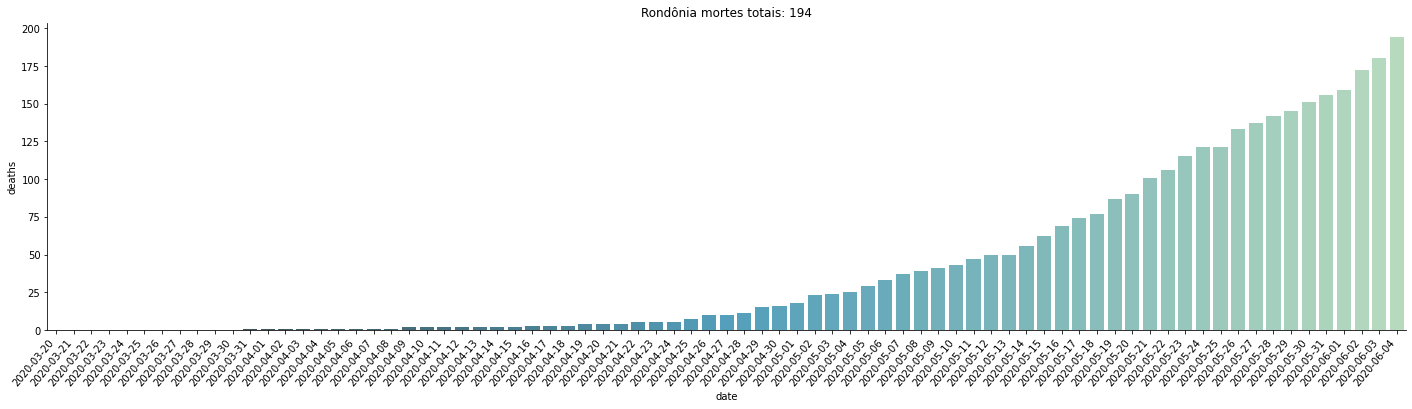

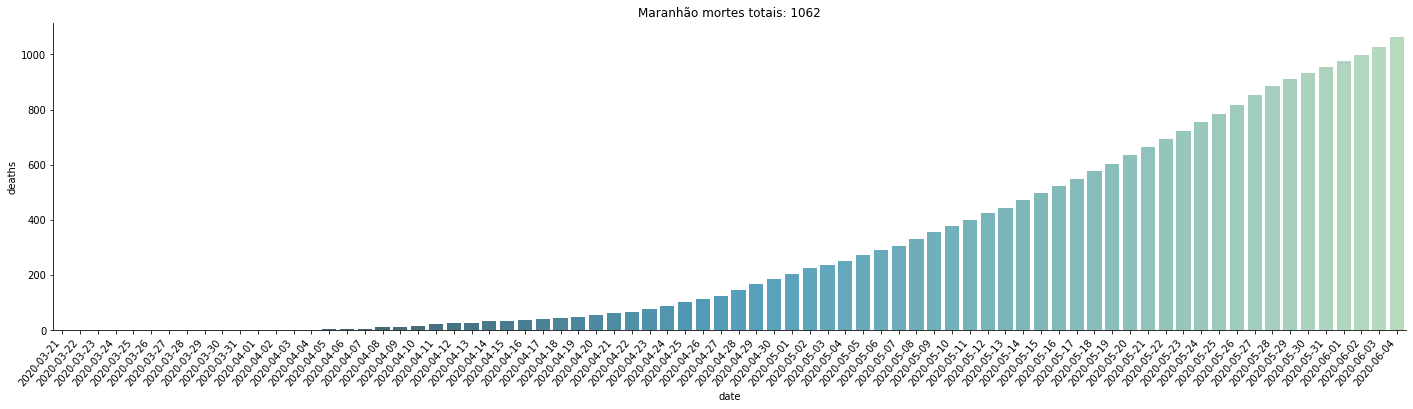

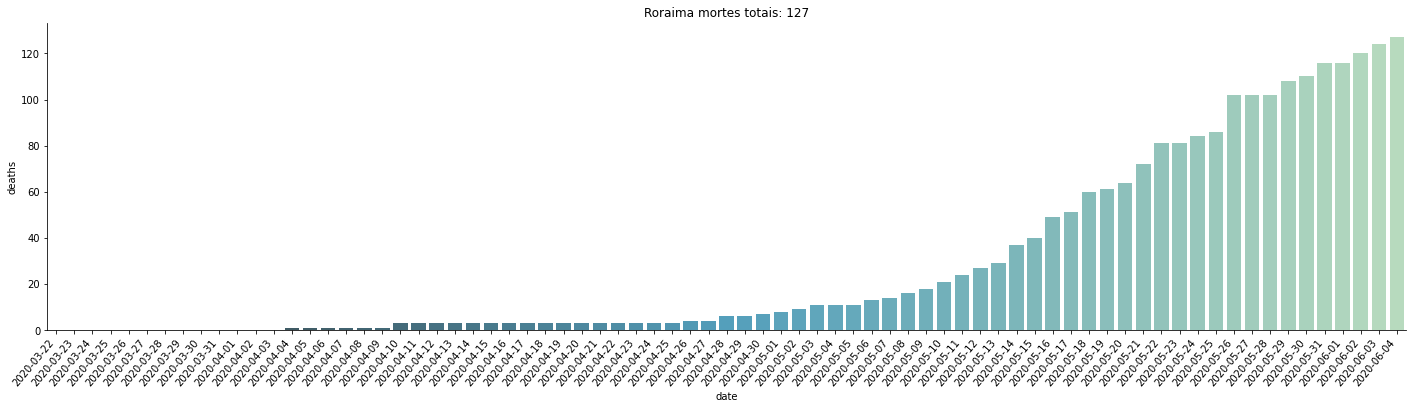

In [34]:
for i in range(len(d)):
  p = sns.catplot(x='date',y='deaths', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=4)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(50)
        label.set_horizontalalignment('right')
  Mortes_confirmadas = dadosPorEstado[d[i]]['deaths']
  Mortes_confirmadas.index = range(Mortes_confirmadas.shape[0])
  plt.title(d[i]+' mortes totais: '+str(Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]))
  print(p)

In [31]:
d[0]
Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]

127